In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [121]:
import os
print(os.getcwd())

c:\Users\daniel\AppData\Local\Programs\Microsoft VS Code


In [4]:
import sqlite3
import pandas as pd

# Connexion au fichier local
conn = sqlite3.connect("databasenew.sqlite")

# Exemple : lire quelques lignes d'une table
df = pd.read_sql("SELECT * FROM Match LIMIT 5", conn)
df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,...,2.30,2.65,3.25,2.35,2.90,3.25,2.30,2.80,3.2,2.25
1,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,...,2.25,2.65,3.20,2.35,2.90,3.20,2.30,2.62,3.2,2.38
2,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,...,8.50,1.30,4.35,8.00,1.35,4.33,8.50,1.36,4.2,7.00
3,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,...,1.73,4.35,3.30,1.75,4.50,3.40,1.75,4.20,3.3,1.75
4,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,...,5.00,1.65,3.50,4.50,1.65,3.50,5.00,1.70,3.4,4.33


In [24]:
conn = sqlite3.connect("new_soccer_database.sqlite")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

for table in tables:
    print(table[0])

sqlite_sequence
League
Match
Player
Player_Attributes
Team
Team_Attributes
Country


In [5]:
df = pd.read_sql("SELECT * FROM League ", conn)
df.head()
print(df.shape)

(11, 3)


In [6]:
df = pd.read_sql("SELECT * FROM Match ", conn)
df.head()
print(df.shape)

(19798, 115)


In [8]:
delete_query = """
DELETE FROM Match
WHERE
    home_player_1 IS NULL AND home_player_2 IS NULL AND home_player_3 IS NULL AND home_player_4 IS NULL AND
    home_player_5 IS NULL AND home_player_6 IS NULL AND home_player_7 IS NULL AND home_player_8 IS NULL AND
    home_player_9 IS NULL AND home_player_10 IS NULL AND home_player_11 IS NULL AND
    away_player_1 IS NULL AND away_player_2 IS NULL AND away_player_3 IS NULL AND away_player_4 IS NULL AND
    away_player_5 IS NULL AND away_player_6 IS NULL AND away_player_7 IS NULL AND away_player_8 IS NULL AND
    away_player_9 IS NULL AND away_player_10 IS NULL AND away_player_11 IS NULL;
"""

# Exécuter la requête
conn.execute(delete_query)

# Étape 2: Lire à nouveau les données dans un DataFrame après le nettoyage (optionnel)
df_match_cleaned = pd.read_sql("SELECT * FROM Match", conn)

# Étape 3: Réécrire le DataFrame nettoyé dans la table 'Match' avec la commande `to_sql`
df_match_cleaned.to_sql('Match', conn, if_exists='replace', index=False)

19798

In [9]:
conn.execute("""
DELETE FROM Match
WHERE
    home_player_1 IS NULL AND home_player_2 IS NULL AND home_player_3 IS NULL AND home_player_4 IS NULL AND
    home_player_5 IS NULL AND home_player_6 IS NULL AND home_player_7 IS NULL AND home_player_8 IS NULL AND
    home_player_9 IS NULL AND home_player_10 IS NULL AND home_player_11 IS NULL AND
    away_player_1 IS NULL AND away_player_2 IS NULL AND away_player_3 IS NULL AND away_player_4 IS NULL AND
    away_player_5 IS NULL AND away_player_6 IS NULL AND away_player_7 IS NULL AND away_player_8 IS NULL AND
    away_player_9 IS NULL AND away_player_10 IS NULL AND away_player_11 IS NULL;
""")
conn.commit()

conn.execute("""
DELETE FROM Match
WHERE
    goal IS NULL AND shoton IS NULL AND shotoff IS NULL AND foulcommit IS NULL AND
    card IS NULL AND cross IS NULL AND corner IS NULL AND possession IS NULL AND
    B365H IS NULL AND B365D IS NULL AND B365A IS NULL AND BWH IS NULL AND BWD IS NULL AND
    BWA IS NULL AND IWH IS NULL AND IWD IS NULL AND IWA IS NULL AND LBH IS NULL AND LBD IS NULL AND
    LBA IS NULL AND PSH IS NULL AND PSD IS NULL AND PSA IS NULL AND WHH IS NULL AND
    WHD IS NULL AND WHA IS NULL AND SJH IS NULL AND SJD IS NULL AND SJA IS NULL;
""")
conn.commit()

# 🔹 Étape 2 : supprimer les doublons (on conserve la ligne avec le plus petit id)
conn.execute("""
DELETE FROM Match
WHERE id NOT IN (
    SELECT MIN(id)
    FROM Match
    GROUP BY
        country_id, league_id, season, date, match_api_id,
        home_team_api_id, away_team_api_id, home_team_goal, away_team_goal,
        goal, shoton, shotoff, foulcommit, card, cross, corner, possession,
        B365H, B365D, B365A, BWH, BWD, BWA,
        IWH, IWD, IWA, LBH, LBD, LBA,
        PSH, PSD, PSA, WHH, WHD, WHA,
        SJH, SJD, SJA,
        home_player_1, home_player_2, home_player_3, home_player_4, home_player_5,
        home_player_6, home_player_7, home_player_8, home_player_9, home_player_10, home_player_11,
        away_player_1, away_player_2, away_player_3, away_player_4, away_player_5,
        away_player_6, away_player_7, away_player_8, away_player_9, away_player_10, away_player_11
);
""")
conn.commit()

# 🔹 Étape 3 : charger la table nettoyée dans un DataFrame
df_match_cleaned = pd.read_sql("SELECT * FROM Match", conn)

# 🔹 Étape 4 : réécriture dans la table Match (si nécessaire)
df_match_cleaned.to_sql("Match", conn, if_exists="replace", index=False)

19798

In [10]:
conn.execute("""
UPDATE Match
SET
    home_player_X1 = COALESCE(home_player_X1, 0),
    home_player_X2 = COALESCE(home_player_X2, 0),
    home_player_X3 = COALESCE(home_player_X3, 0),
    home_player_X4 = COALESCE(home_player_X4, 0),
    home_player_X5 = COALESCE(home_player_X5, 0),
    home_player_X6 = COALESCE(home_player_X6, 0),
    home_player_X7 = COALESCE(home_player_X7, 0),
    home_player_X8 = COALESCE(home_player_X8, 0),
    home_player_X9 = COALESCE(home_player_X9, 0),
    home_player_X10 = COALESCE(home_player_X10, 0),
    home_player_X11 = COALESCE(home_player_X11, 0),
    away_player_X1 = COALESCE(away_player_X1, 0),
    away_player_X2 = COALESCE(away_player_X2, 0),
    away_player_X3 = COALESCE(away_player_X3, 0),
    away_player_X4 = COALESCE(away_player_X4, 0),
    away_player_X5 = COALESCE(away_player_X5, 0),
    away_player_X6 = COALESCE(away_player_X6, 0),
    away_player_X7 = COALESCE(away_player_X7, 0),
    away_player_X8 = COALESCE(away_player_X8, 0),
    away_player_X9 = COALESCE(away_player_X9, 0),
    away_player_X10 = COALESCE(away_player_X10, 0),
    away_player_X11 = COALESCE(away_player_X11, 0),
    home_player_Y1 = COALESCE(home_player_Y1, 0),
    home_player_Y2 = COALESCE(home_player_Y2, 0),
    home_player_Y3 = COALESCE(home_player_Y3, 0),
    home_player_Y4 = COALESCE(home_player_Y4, 0),
    home_player_Y5 = COALESCE(home_player_Y5, 0),
    home_player_Y6 = COALESCE(home_player_Y6, 0),
    home_player_Y7 = COALESCE(home_player_Y7, 0),
    home_player_Y8 = COALESCE(home_player_Y8, 0),
    home_player_Y9 = COALESCE(home_player_Y9, 0),
    home_player_Y10 = COALESCE(home_player_Y10, 0),
    home_player_Y11 = COALESCE(home_player_Y11, 0),
    away_player_Y1 = COALESCE(away_player_Y1, 0),
    away_player_Y2 = COALESCE(away_player_Y2, 0),
    away_player_Y3 = COALESCE(away_player_Y3, 0),
    away_player_Y4 = COALESCE(away_player_Y4, 0),
    away_player_Y5 = COALESCE(away_player_Y5, 0),
    away_player_Y6 = COALESCE(away_player_Y6, 0),
    away_player_Y7 = COALESCE(away_player_Y7, 0),
    away_player_Y8 = COALESCE(away_player_Y8, 0),
    away_player_Y9 = COALESCE(away_player_Y9, 0),
    away_player_Y10 = COALESCE(away_player_Y10, 0),
    away_player_Y11 = COALESCE(away_player_Y11, 0);
""")
conn.commit()

# 🔹 Étape 5 : lecture dans un DataFrame
df_match_cleaned = pd.read_sql("SELECT * FROM Match", conn)

# 🔹 Étape 6 : écriture de la version nettoyée dans la table Match
df_match_cleaned.to_sql("Match", conn, if_exists="replace", index=False)

19798

In [11]:
# 🔹 Remplacement des NULL dans PSA par la moyenne de PSA
conn.execute("""
UPDATE Match
SET PSA = (
    SELECT AVG(PSA)
    FROM Match
    WHERE PSA IS NOT NULL
)
WHERE PSA IS NULL;
""")

# 🔹 Remplacement des NULL dans PSD par la moyenne de PSD
conn.execute("""
UPDATE Match
SET PSD = (
    SELECT AVG(PSD)
    FROM Match
    WHERE PSD IS NOT NULL
)
WHERE PSD IS NULL;
""")

# 🔹 Remplacement des NULL dans PSH par la moyenne de PSH
conn.execute("""
UPDATE Match
SET PSH = (
    SELECT AVG(PSH)
    FROM Match
    WHERE PSH IS NOT NULL
)
WHERE PSH IS NULL;
""")

conn.commit()

df_match_cleaned = pd.read_sql("SELECT * FROM Match", conn)

# 🔹 Étape 6 : écriture de la version nettoyée dans la table Match
df_match_cleaned.to_sql("Match", conn, if_exists="replace", index=False)

19798

In [12]:
# Vérifie les valeurs nulles dans les 16 dernières colonnes
nulls_last_16 = df_match_cleaned.iloc[:, -16:].isnull().sum()

# Affiche les colonnes qui ont au moins un null
print(nulls_last_16[nulls_last_16 > 0])

Series([], dtype: int64)


In [13]:
# 🔹 Remplacement des NULL par la moyenne pour les cotes de paris
columns = [
    "WHH", "WHD", "WHA",
    "SJH", "SJD", "SJA",
    "VCH", "VCD", "VCA",
    "GBH", "GBD", "GBA",
    "BSH", "BSD", "BSA"
]

for col in columns:
    # Étape 1 : calcul de la moyenne (hors NULL)
    avg_query = f"SELECT AVG({col}) FROM Match WHERE {col} IS NOT NULL;"
    avg_value = conn.execute(avg_query).fetchone()[0]

    # Étape 2 : mise à jour des NULL avec la moyenne
    if avg_value is not None:
        update_query = f"UPDATE Match SET {col} = {avg_value} WHERE {col} IS NULL;"
        conn.execute(update_query)

conn.commit()

df_match_cleaned = pd.read_sql("SELECT * FROM Match", conn)

# 🔹 Étape 6 : écriture de la version nettoyée dans la table Match
df_match_cleaned.to_sql("Match", conn, if_exists="replace", index=False)

19798

In [43]:
# Liste des colonnes ciblées
cols = df_match_cleaned.loc[:, 'B365H':'LBA'].columns

# Comptage des valeurs nulles par colonne
null_counts = df_match_cleaned[cols].isnull().sum()
print(null_counts)

B365H    118
B365D    118
B365A    118
BWH      135
BWD      135
BWA      135
IWH      190
IWD      190
IWA      190
LBH      154
LBD      154
LBA      154
dtype: int64


In [14]:
# Liste des colonnes concernées (de B365H à LBA inclus)
columns = [
    'B365H', 'B365D', 'B365A',
    'BWH', 'BWD', 'BWA',
    'IWH', 'IWD', 'IWA',
    'LBH', 'LBD', 'LBA'
]

# Boucle pour calculer la moyenne et remplacer les NULL
for col in columns:
    # Calcul de la moyenne de la colonne (en excluant les NULL)
    mean_value = conn.execute(f"SELECT AVG({col}) FROM Match WHERE {col} IS NOT NULL").fetchone()[0]
    
    # Remplacement des valeurs NULL par la moyenne
    conn.execute(f"""
        UPDATE Match
        SET {col} = ?
        WHERE {col} IS NULL;
    """, (mean_value,))

conn.commit()

df_match_cleaned = pd.read_sql("SELECT * FROM Match", conn)

# 🔹 Étape 6 : écriture de la version nettoyée dans la table Match
df_match_cleaned.to_sql("Match", conn, if_exists="replace", index=False)

19798

In [15]:

# Colonnes concernées
columns = [
    "goal", "shoton", "shotoff", "foulcommit",
    "card", "cross", "corner", "possession"
]

# Remplacer les NULL par 'unknown'
for col in columns:
    conn.execute(f"""
        UPDATE Match
        SET {col} = 'unknown'
        WHERE {col} IS NULL;
    """)
conn.commit()

df_match_cleaned = pd.read_sql("SELECT * FROM Match", conn)

# 🔹 Étape 6 : écriture de la version nettoyée dans la table Match
df_match_cleaned.to_sql("Match", conn, if_exists="replace", index=False)

19798

In [180]:
# Liste des colonnes home_player_1 à away_player_11
player_cols = [f'home_player_{i}' for i in range(1, 12)] + [f'away_player_{i}' for i in range(1, 12)]

# Comptage des valeurs nulles dans df_match_cleaned
null_counts = {col: df_match_cleaned.loc[df_match_cleaned[col].isnull()].shape[0] for col in player_cols}

# Affichage du résultat
for col, count in null_counts.items():
    print(f"{col}: {count} valeurs nulles")

home_player_1: 105 valeurs nulles
home_player_2: 146 valeurs nulles
home_player_3: 130 valeurs nulles
home_player_4: 126 valeurs nulles
home_player_5: 135 valeurs nulles
home_player_6: 126 valeurs nulles
home_player_7: 139 valeurs nulles
home_player_8: 149 valeurs nulles
home_player_9: 135 valeurs nulles
home_player_10: 210 valeurs nulles
home_player_11: 164 valeurs nulles
away_player_1: 109 valeurs nulles
away_player_2: 134 valeurs nulles
away_player_3: 139 valeurs nulles
away_player_4: 137 valeurs nulles
away_player_5: 131 valeurs nulles
away_player_6: 134 valeurs nulles
away_player_7: 134 valeurs nulles
away_player_8: 143 valeurs nulles
away_player_9: 158 valeurs nulles
away_player_10: 194 valeurs nulles
away_player_11: 184 valeurs nulles


In [181]:
player_cols = [f'home_player_{i}' for i in range(1, 12)] + [f'away_player_{i}' for i in range(1, 12)]

# Compter les lignes avec au moins un null dans ces colonnes
total_null_rows = df_match_cleaned.loc[df_match_cleaned[player_cols].isnull().any(axis=1)].shape[0]

print(f"Nombre de lignes avec au moins une valeur nulle parmi les colonnes home/away_player_1 à 11 : {total_null_rows}")

Nombre de lignes avec au moins une valeur nulle parmi les colonnes home/away_player_1 à 11 : 2397


In [182]:
delete_query = """
DELETE FROM Match
WHERE
    home_player_1 IS NULL OR home_player_2 IS NULL OR home_player_3 IS NULL OR
    home_player_4 IS NULL OR home_player_5 IS NULL OR home_player_6 IS NULL OR
    home_player_7 IS NULL OR home_player_8 IS NULL OR home_player_9 IS NULL OR
    home_player_10 IS NULL OR home_player_11 IS NULL OR
    away_player_1 IS NULL OR away_player_2 IS NULL OR away_player_3 IS NULL OR
    away_player_4 IS NULL OR away_player_5 IS NULL OR away_player_6 IS NULL OR
    away_player_7 IS NULL OR away_player_8 IS NULL OR away_player_9 IS NULL OR
    away_player_10 IS NULL OR away_player_11 IS NULL;
"""

cursor.execute(delete_query)
conn.commit()

df_match_cleaned = pd.read_sql("SELECT * FROM Match", conn)

# 🔹 Étape 6 : écriture de la version nettoyée dans la table Match
df_match_cleaned.to_sql("Match", conn, if_exists="replace", index=False)

19798

In [183]:

colonnes_cibles = df_match_cleaned.loc[:, 'goal':'possession'].columns

# Comptage des valeurs nulles dans ces colonnes
df_match_cleaned[colonnes_cibles].isnull().sum()

goal          0
shoton        0
shotoff       0
foulcommit    0
card          0
cross         0
corner        0
possession    0
dtype: int64

In [186]:
sample_goal = df_match_cleaned['goal']

print(sample_goal[:2000])

0                                                 unknown
1                                                 unknown
2                                                 unknown
3                                                 unknown
4                                                 unknown
                              ...                        
1995    <goal><value><comment>n</comment><stats><goals...
1996    <goal><value><comment>n</comment><stats><goals...
1997    <goal><value><comment>n</comment><stats><goals...
1998                                             <goal />
1999    <goal><value><comment>n</comment><stats><goals...
Name: goal, Length: 2000, dtype: object


In [187]:
df_goal_cleaned = df_match_cleaned[
    (df_match_cleaned['goal'].notna()) & 
    (df_match_cleaned['goal'] != 'unknown') & 
    (df_match_cleaned['goal'].str.strip() != '')
]

In [188]:
print(df_goal_cleaned['goal'].iloc[0][:500])


<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24


In [189]:
import xml.etree.ElementTree as ET

sample_xml = df_goal_cleaned['goal'].iloc[0]

root = ET.fromstring(sample_xml)

# Exemple : afficher les balises enfant
for elem in root.iter():
    print(elem.tag, elem.text)

goal None
value None
comment n
stats None
goals 1
shoton 1
event_incident_typefk 406
elapsed 22
player2 38807
subtype header
player1 37799
sortorder 5
team 10261
id 378998
n 295
type goal
goal_type n
value None
comment n
stats None
goals 1
shoton 1
event_incident_typefk 393
elapsed 24
player2 24154
subtype shot
player1 24148
sortorder 4
team 10260
id 379019
n 298
type goal
goal_type n


In [57]:
query = """SELECT
    SUM(CASE WHEN id IS NULL THEN 1 ELSE 0 END) AS id_nulls,
    SUM(CASE WHEN player_fifa_api_id IS NULL THEN 1 ELSE 0 END) AS player_fifa_api_id_nulls,
    SUM(CASE WHEN player_api_id IS NULL THEN 1 ELSE 0 END) AS player_api_id_nulls,
    SUM(CASE WHEN date IS NULL THEN 1 ELSE 0 END) AS date_nulls,
    SUM(CASE WHEN overall_rating IS NULL THEN 1 ELSE 0 END) AS overall_rating_nulls,
    SUM(CASE WHEN potential IS NULL THEN 1 ELSE 0 END) AS potential_nulls,
    SUM(CASE WHEN preferred_foot IS NULL THEN 1 ELSE 0 END) AS preferred_foot_nulls,
    SUM(CASE WHEN attacking_work_rate IS NULL THEN 1 ELSE 0 END) AS attacking_work_rate_nulls,
    SUM(CASE WHEN defensive_work_rate IS NULL THEN 1 ELSE 0 END) AS defensive_work_rate_nulls,
    SUM(CASE WHEN crossing IS NULL THEN 1 ELSE 0 END) AS crossing_nulls,
    SUM(CASE WHEN finishing IS NULL THEN 1 ELSE 0 END) AS finishing_nulls,
    SUM(CASE WHEN heading_accuracy IS NULL THEN 1 ELSE 0 END) AS heading_accuracy_nulls,
    SUM(CASE WHEN short_passing IS NULL THEN 1 ELSE 0 END) AS short_passing_nulls,
    SUM(CASE WHEN volleys IS NULL THEN 1 ELSE 0 END) AS volleys_nulls,
    SUM(CASE WHEN dribbling IS NULL THEN 1 ELSE 0 END) AS dribbling_nulls,
    SUM(CASE WHEN curve IS NULL THEN 1 ELSE 0 END) AS curve_nulls,
    SUM(CASE WHEN free_kick_accuracy IS NULL THEN 1 ELSE 0 END) AS free_kick_accuracy_nulls,
    SUM(CASE WHEN long_passing IS NULL THEN 1 ELSE 0 END) AS long_passing_nulls,
    SUM(CASE WHEN ball_control IS NULL THEN 1 ELSE 0 END) AS ball_control_nulls,
    SUM(CASE WHEN acceleration IS NULL THEN 1 ELSE 0 END) AS acceleration_nulls,
    SUM(CASE WHEN sprint_speed IS NULL THEN 1 ELSE 0 END) AS sprint_speed_nulls,
    SUM(CASE WHEN agility IS NULL THEN 1 ELSE 0 END) AS agility_nulls,
    SUM(CASE WHEN reactions IS NULL THEN 1 ELSE 0 END) AS reactions_nulls,
    SUM(CASE WHEN balance IS NULL THEN 1 ELSE 0 END) AS balance_nulls,
    SUM(CASE WHEN shot_power IS NULL THEN 1 ELSE 0 END) AS shot_power_nulls,
    SUM(CASE WHEN jumping IS NULL THEN 1 ELSE 0 END) AS jumping_nulls,
    SUM(CASE WHEN stamina IS NULL THEN 1 ELSE 0 END) AS stamina_nulls,
    SUM(CASE WHEN strength IS NULL THEN 1 ELSE 0 END) AS strength_nulls,
    SUM(CASE WHEN long_shots IS NULL THEN 1 ELSE 0 END) AS long_shots_nulls,
    SUM(CASE WHEN aggression IS NULL THEN 1 ELSE 0 END) AS aggression_nulls,
    SUM(CASE WHEN interceptions IS NULL THEN 1 ELSE 0 END) AS interceptions_nulls,
    SUM(CASE WHEN positioning IS NULL THEN 1 ELSE 0 END) AS positioning_nulls,
    SUM(CASE WHEN vision IS NULL THEN 1 ELSE 0 END) AS vision_nulls,
    SUM(CASE WHEN penalties IS NULL THEN 1 ELSE 0 END) AS penalties_nulls,
    SUM(CASE WHEN marking IS NULL THEN 1 ELSE 0 END) AS marking_nulls,
    SUM(CASE WHEN standing_tackle IS NULL THEN 1 ELSE 0 END) AS standing_tackle_nulls,
    SUM(CASE WHEN sliding_tackle IS NULL THEN 1 ELSE 0 END) AS sliding_tackle_nulls,
    SUM(CASE WHEN gk_diving IS NULL THEN 1 ELSE 0 END) AS gk_diving_nulls,
    SUM(CASE WHEN gk_handling IS NULL THEN 1 ELSE 0 END) AS gk_handling_nulls,
    SUM(CASE WHEN gk_kicking IS NULL THEN 1 ELSE 0 END) AS gk_kicking_nulls,
    SUM(CASE WHEN gk_positioning IS NULL THEN 1 ELSE 0 END) AS gk_positioning_nulls,
    SUM(CASE WHEN gk_reflexes IS NULL THEN 1 ELSE 0 END) AS gk_reflexes_nulls
FROM Player_Attributes;"""
df_nulls = pd.read_sql(query, conn)
print(df_nulls.T)

                              0
id_nulls                      0
player_fifa_api_id_nulls      0
player_api_id_nulls           0
date_nulls                    0
overall_rating_nulls        835
potential_nulls             835
preferred_foot_nulls        835
attacking_work_rate_nulls  3229
defensive_work_rate_nulls   835
crossing_nulls              835
finishing_nulls             835
heading_accuracy_nulls      835
short_passing_nulls         835
volleys_nulls              2712
dribbling_nulls             835
curve_nulls                2712
free_kick_accuracy_nulls    835
long_passing_nulls          835
ball_control_nulls          835
acceleration_nulls          835
sprint_speed_nulls          835
agility_nulls              2712
reactions_nulls             835
balance_nulls              2712
shot_power_nulls            835
jumping_nulls              2712
stamina_nulls               835
strength_nulls              835
long_shots_nulls            835
aggression_nulls            835
intercep

In [190]:
# Étape 1 : remplacer les NULLs des colonnes textuelles par 'unknown'
text_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

for col in text_columns:
    cursor.execute(f"""
        UPDATE Player_Attributes
        SET {col} = 'unknown'
        WHERE {col} IS NULL;
    """)
    print(f"{col} → NULL remplacé par 'unknown'")

# Étape 2 : remplacer les NULLs des colonnes numériques par la moyenne
cursor.execute("PRAGMA table_info(Player_Attributes);")
columns = cursor.fetchall()

# On exclut les 4 premières colonnes
columns_to_fill = [col[1] for col in columns[4:] if col[2].lower() in ('integer', 'real')]

for col in columns_to_fill:
    cursor.execute(f"SELECT AVG({col}) FROM Player_Attributes WHERE {col} IS NOT NULL;")
    mean_val = cursor.fetchone()[0]
    
    if mean_val is not None:
        cursor.execute(f"""
            UPDATE Player_Attributes
            SET {col} = {mean_val}
            WHERE {col} IS NULL;
        """)
        print(f"{col} → remplacé par sa moyenne : {mean_val:.2f}")

# Valider les changements
conn.commit()

preferred_foot → NULL remplacé par 'unknown'


OperationalError: no such column: attacking_work_rate

In [191]:
cursor.execute("SELECT DISTINCT preferred_foot FROM Player_Attributes")
print(cursor.fetchall())

[('right',), ('left',)]


In [192]:
df = pd.read_sql("""
SELECT player_api_id, preferred_foot 
FROM Player_Attributes 
WHERE preferred_foot = 'unknown'
LIMIT 10
""", conn)

print(df)

Empty DataFrame
Columns: [player_api_id, preferred_foot]
Index: []


In [193]:
# Remplace les mauvaises valeurs "0.0" par 'unknown'
cursor.execute("""
    UPDATE Player_Attributes
    SET preferred_foot = 'unknown'
    WHERE preferred_foot = '0.0';
""")

In [168]:
# Remplace les mauvaises valeurs "0.0" par 'unknown'
cursor.execute("""
    UPDATE Player_Attributes
    SET attacking_work_rate = 'unknown'
    WHERE attacking_work_rate = '0.0';
""")

In [174]:
cursor.execute("SELECT DISTINCT attacking_work_rate FROM Player_Attributes")
print(cursor.fetchall())

[('medium',), ('high',), ('low',), ('None',)]


In [170]:
noisy_values="""SELECT attacking_work_rate, COUNT(*) AS occurences
FROM Player_Attributes
GROUP BY attacking_work_rate
ORDER BY occurences DESC;"""

noisy_values=pd.read_sql(noisy_values,conn)
noisy_values.head()

,attacking_work_rate,occurences
0,medium,125070
1,high,42823
2,low,8569
3,None,3639
4,unknown,3229


In [171]:
noisy_values2="""SELECT defensive_work_rate, COUNT(*) AS occurences
FROM Player_Attributes
GROUP BY defensive_work_rate
ORDER BY occurences DESC;"""

noisy_values2=pd.read_sql(noisy_values2,conn)
noisy_values2.head()

,defensive_work_rate,occurences
0,medium,130846
1,high,27041
2,low,18432
3,_0,2394
4,o,1550


In [166]:
cursor.execute("SELECT DISTINCT preferred_foot FROM Player_Attributes")
print(cursor.fetchall())

[('right',), ('left',), ('unknown',)]


In [172]:
conn.execute("""DELETE FROM Player_Attributes
WHERE defensive_work_rate NOT IN ('low', 'medium', 'high');""")

In [175]:
conn.execute("""DELETE FROM Player_Attributes
WHERE attacking_work_rate NOT IN ('low', 'medium', 'high','unknow');""")

In [194]:
conn.execute("""
DELETE FROM Player_Attributes
WHERE id NOT IN (
    SELECT MIN(id)
    FROM Player_Attributes
    GROUP BY
        player_fifa_api_id, player_api_id, date, overall_rating, potential,
        preferred_foot, attacking_work_rate, defensive_work_rate,
        crossing, finishing, heading_accuracy, short_passing, volleys,
        dribbling, curve, free_kick_accuracy, long_passing, ball_control,
        acceleration, sprint_speed, agility, reactions, balance,
        shot_power, jumping, stamina, strength, long_shots, aggression,
        interceptions, positioning, vision, penalties, marking,
        standing_tackle, sliding_tackle, gk_diving, gk_handling,
        gk_kicking, gk_positioning, gk_reflexes
);
""")
conn.commit()

# 🔹 Étape 3 : charger la table nettoyée dans un DataFrame
df_player_attr_cleaned = pd.read_sql("SELECT * FROM Player_Attributes", conn)

# Renommer les colonnes
df_player_attr_cleaned.rename(columns={
    "attacking_work_rate": "attacking_work_level",
    "defensive_work_rate": "defensive_work_level"
}, inplace=True)


# 🔹 Étape 4 : réécriture dans la table Player_Attributes (si nécessaire)
df_player_attr_cleaned.to_sql("Player_Attributes", conn, if_exists="replace", index=False)

OperationalError: no such column: attacking_work_rate

In [196]:
df_player_attr_cleaned.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_level,defensive_work_level,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [195]:
cursor.execute("PRAGMA table_info(Player_Attributes);")
for row in cursor.fetchall():
    print(row)

(0, 'id', 'INTEGER', 0, None, 0)
(1, 'player_fifa_api_id', 'INTEGER', 0, None, 0)
(2, 'player_api_id', 'INTEGER', 0, None, 0)
(3, 'date', 'TEXT', 0, None, 0)
(4, 'overall_rating', 'REAL', 0, None, 0)
(5, 'potential', 'REAL', 0, None, 0)
(6, 'preferred_foot', 'TEXT', 0, None, 0)
(7, 'attacking_work_level', 'TEXT', 0, None, 0)
(8, 'defensive_work_level', 'TEXT', 0, None, 0)
(9, 'crossing', 'REAL', 0, None, 0)
(10, 'finishing', 'REAL', 0, None, 0)
(11, 'heading_accuracy', 'REAL', 0, None, 0)
(12, 'short_passing', 'REAL', 0, None, 0)
(13, 'volleys', 'REAL', 0, None, 0)
(14, 'dribbling', 'REAL', 0, None, 0)
(15, 'curve', 'REAL', 0, None, 0)
(16, 'free_kick_accuracy', 'REAL', 0, None, 0)
(17, 'long_passing', 'REAL', 0, None, 0)
(18, 'ball_control', 'REAL', 0, None, 0)
(19, 'acceleration', 'REAL', 0, None, 0)
(20, 'sprint_speed', 'REAL', 0, None, 0)
(21, 'agility', 'REAL', 0, None, 0)
(22, 'reactions', 'REAL', 0, None, 0)
(23, 'balance', 'REAL', 0, None, 0)
(24, 'shot_power', 'REAL', 0, None,

In [197]:
df = pd.read_sql("SELECT DISTINCT preferred_foot FROM Player_Attributes", conn)
print(df)

  preferred_foot
0          right
1           left


In [38]:
verrif="""SELECT *
FROM Team_Attributes
WHERE
    team_api_id IS NULL OR
    date IS NULL OR
    buildUpPlaySpeed IS NULL OR
    buildUpPlayDribbling IS NULL OR
    buildUpPlayPassing IS NULL OR
    chanceCreationPassing IS NULL OR
    chanceCreationCrossing IS NULL OR
    chanceCreationShooting IS NULL OR
    defencePressure IS NULL OR
    defenceAggression IS NULL OR
    defenceTeamWidth IS NULL;"""

verrif=pd.read_sql(verrif,conn)
print(verrif)

       id  team_fifa_api_id  team_api_id                 date  \
0       1               434         9930  2010-02-22 00:00:00   
1       4                77         8485  2010-02-22 00:00:00   
2       5                77         8485  2011-02-22 00:00:00   
3       6                77         8485  2012-02-22 00:00:00   
4       7                77         8485  2013-09-20 00:00:00   
..    ...               ...          ...                  ...   
964  1448               244         8394  2013-09-20 00:00:00   
965  1453             15005        10000  2010-02-22 00:00:00   
966  1454             15005        10000  2011-02-22 00:00:00   
967  1455             15005        10000  2012-02-22 00:00:00   
968  1456             15005        10000  2013-09-20 00:00:00   

     buildUpPlaySpeed buildUpPlaySpeedClass buildUpPlayDribbling  \
0                  60              Balanced                 None   
1                  70                  Fast                 None   
2              

In [46]:
cursor = conn.execute("PRAGMA table_info(Team_Attributes);")
columns = [row[1] for row in cursor.fetchall()]

# Vérification du nombre de NULLs par colonne
for col in columns:
    query = f"SELECT COUNT(*) FROM Team_Attributes WHERE {col} IS NULL;"
    count = conn.execute(query).fetchone()[0]
    print(f"{col}: {count} NULLs")

id: 0 NULLs
team_fifa_api_id: 0 NULLs
team_api_id: 0 NULLs
date: 0 NULLs
buildUpPlaySpeed: 0 NULLs
buildUpPlaySpeedClass: 0 NULLs
buildUpPlayDribbling: 969 NULLs
buildUpPlayDribblingClass: 0 NULLs
buildUpPlayPassing: 0 NULLs
buildUpPlayPassingClass: 0 NULLs
buildUpPlayPositioningClass: 0 NULLs
chanceCreationPassing: 0 NULLs
chanceCreationPassingClass: 0 NULLs
chanceCreationCrossing: 0 NULLs
chanceCreationCrossingClass: 0 NULLs
chanceCreationShooting: 0 NULLs
chanceCreationShootingClass: 0 NULLs
chanceCreationPositioningClass: 0 NULLs
defencePressure: 0 NULLs
defencePressureClass: 0 NULLs
defenceAggression: 0 NULLs
defenceAggressionClass: 0 NULLs
defenceTeamWidth: 0 NULLs
defenceTeamWidthClass: 0 NULLs
defenceDefenderLineClass: 0 NULLs


In [47]:
# Étape 1 : Calcul de la moyenne de buildUpPlayDribbling
mean_dribbling = pd.read_sql("""
    SELECT AVG(buildUpPlayDribbling) AS mean_value
    FROM Team_Attributes
    WHERE buildUpPlayDribbling IS NOT NULL;
""", conn).iloc[0]['mean_value']

# Étape 2 : Remplacement des NULLs par la moyenne
conn.execute(f"""
    UPDATE Team_Attributes
    SET buildUpPlayDribbling = {mean_dribbling}
    WHERE buildUpPlayDribbling IS NULL;
""")
conn.commit()

In [48]:
#Étape 2 : supprimer les doublons (conserver la ligne avec le plus petit id)
conn.execute("""
DELETE FROM Team_Attributes
WHERE id NOT IN (
    SELECT MIN(id)
    FROM Team_Attributes
    GROUP BY
        team_api_id, date,
        buildUpPlaySpeed, buildUpPlaySpeedClass,
        buildUpPlayDribbling, buildUpPlayDribblingClass,
        buildUpPlayPassing, buildUpPlayPassingClass,
        buildUpPlayPositioningClass,
        chanceCreationPassing, chanceCreationPassingClass,
        chanceCreationCrossing, chanceCreationCrossingClass,
        chanceCreationShooting, chanceCreationShootingClass,
        chanceCreationPositioningClass,
        defencePressure, defencePressureClass,
        defenceAggression, defenceAggressionClass,
        defenceTeamWidth, defenceTeamWidthClass,
        defenceDefenderLineClass
);
""")
conn.commit()

# 🔹 Étape 3 : charger la version nettoyée dans un DataFrame
df_team_attributes_cleaned = pd.read_sql("SELECT * FROM Team_Attributes", conn)

# 🔹 Étape 4 : réécriture propre dans la table SQL
df_team_attributes_cleaned.to_sql("Team_Attributes", conn, if_exists="replace", index=False)

1457

In [49]:
teams_att="""select count(*) from Team_Attributes ;"""

teams_att=pd.read_sql(teams_att,conn)
print(teams_att)

   count(*)
0      1457


In [23]:
conn.execute("""
DELETE FROM Player
WHERE
    player_api_id IS NULL OR
    player_name IS NULL;
""")
conn.commit()

# 🔹 Étape 2 : supprimer les doublons en conservant la ligne avec le plus petit id
conn.execute("""
DELETE FROM Player
WHERE id NOT IN (
    SELECT MIN(id)
    FROM Player
    GROUP BY player_api_id, player_name, birthday, height, weight
);
""")
conn.commit()

# 🔹 Étape 3 : recharger la table nettoyée dans un DataFrame
df_player_cleaned = pd.read_sql("SELECT * FROM Player", conn)

# 🔹 Étape 4 : réécriture propre dans la base
df_player_cleaned.to_sql("Player", conn, if_exists="replace", index=False)

11060

In [22]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [256]:
df_Country= pd.read_sql("""SELECT * FROM Country;""", conn)

df_Country.to_sql("Country", conn, if_exists="replace", index=False)

11

In [14]:
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues.head()

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy


In [257]:
df_League= pd.read_sql("""SELECT * FROM League;""", conn)

df_League.to_sql("League", conn, if_exists="replace", index=False)

11

In [23]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA


In [258]:
df_Team= pd.read_sql("""SELECT * FROM Team;""", conn)

df_Team.to_sql("Team", conn, if_exists="replace", index=False)

299

In [27]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('database.sqlite')
df = pd.read_sql("SELECT * FROM Player_Attributes", conn)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [198]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)

detailed_matches.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
2,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
3,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
4,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1


In [254]:
detailed_matches2="""SELECT season, league_id, COUNT(*) AS total_matches
FROM Match
GROUP BY season, league_id;"""

detailed_matches2=pd.read_sql(detailed_matches2,conn)
detailed_matches2.head()

,season,league_id,total_matches
0,2008/2009,1,18
1,2008/2009,1729,348
2,2008/2009,4769,322
3,2008/2009,7809,243
4,2008/2009,10257,321


In [255]:
trend="""SELECT strftime('%Y-%m', date) AS month, SUM(home_team_goal + away_team_goal) AS total_goals
FROM Match
GROUP BY month
ORDER BY month;"""

trend=pd.read_sql(trend,conn)
trend.head()

,month,total_goals
0,2008-08,250
1,2008-09,384
2,2008-10,449
3,2008-11,571
4,2008-12,438


In [ ]:
players_features = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS computation_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY computation_height
                            ORDER BY computation_height
                                ;""", conn)   # Inspired by European Soccer Database Analysis Using SQL on Kaggle  by Md Aaquib Javed.

players_features.head()

,computation_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.795081,73.520820,139.459459
1,168.0,118,68.117359,73.514250,144.127119
2,170.0,403,67.824987,73.414377,147.799007
3,173.0,530,67.130533,73.070302,152.824528
4,175.0,1188,66.988631,72.407995,156.111953


<Axes: title={'center': 'Potential vs Height'}, xlabel='computation_height'>

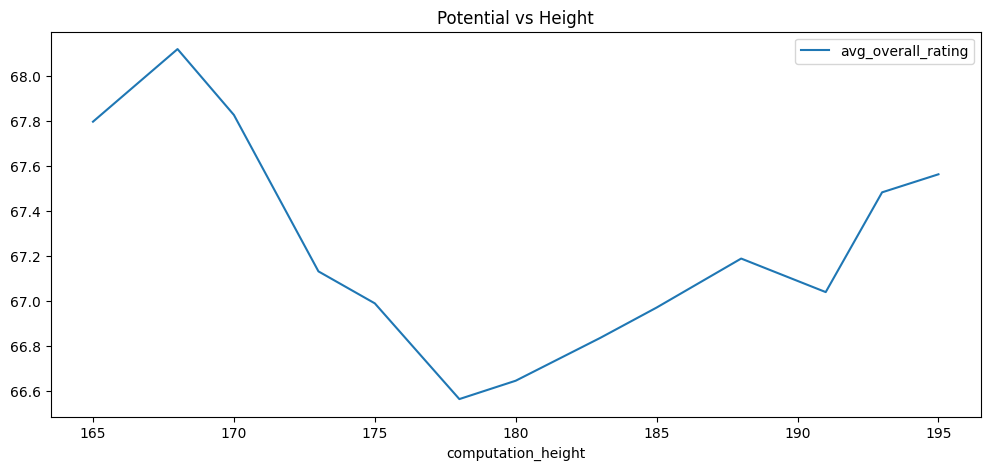

In [34]:
players_features.plot(
    x='computation_height', 
    y='avg_overall_rating', 
    figsize=(12, 5), 
    title='Potential vs Height'
)

In [201]:
oldest_players = pd.read_sql("""
    SELECT 
        player_name, 
        birthday, 
        CAST((julianday((SELECT MAX(date) FROM Player_Attributes)) - julianday(birthday)) / 365.25 AS INTEGER) AS age
    FROM Player
    ORDER BY age DESC
    LIMIT 5;
""", conn)

oldest_players.head()

,player_name,birthday,age
0,Alberto Fontana,1967-01-23 00:00:00,49
1,Paolo Maldini,1968-06-26 00:00:00,48
2,Dean Windass,1969-04-01 00:00:00,47
3,Luca Bucci,1969-03-13 00:00:00,47
4,Rob van Dijk,1969-01-15 00:00:00,47


In [202]:
youngest_players= """
SELECT 
    player_name, 
    birthday, 
    ROUND((julianday((SELECT MAX(date) FROM Player_Attributes)) - julianday(birthday)) / 365.25, 1) AS age
FROM 
    Player
WHERE 
    birthday IS NOT NULL
ORDER BY 
    age ASC
LIMIT 5;
"""

youngest_players = pd.read_sql(youngest_players, conn)
youngest_players.head()

,player_name,birthday,age
0,Jonathan Leko,1999-04-24 00:00:00,17.2
1,Gianluigi Donnarumma,1999-02-25 00:00:00,17.4
2,Alban Lafont,1999-01-23 00:00:00,17.5
3,Kylian Mbappe Lottin,1998-12-20 00:00:00,17.5
4,Reece Oxford,1998-12-16 00:00:00,17.6


In [161]:
# Liste des IDs des joueurs que tu veux comparer
player_ids = (505942, 527104)

# Créer une requête dynamique avec formatage correct de la liste de player_ids
players_evolution = f"""
SELECT Player_Attributes.player_api_id, player_name, date, overall_rating, potential
FROM Player_Attributes
JOIN Player ON Player_Attributes.player_api_id = Player.player_api_id
WHERE Player_Attributes.player_api_id IN {player_ids}
ORDER BY Player_Attributes.player_api_id, date;
"""

# Charger les résultats dans un DataFrame
players_evolution = pd.read_sql(players_evolution, conn)

print(players_evolution)

    player_api_id         player_name                 date  overall_rating  \
0          505942  Aaron Appindangoye  2007-02-22 00:00:00              61   
1          505942  Aaron Appindangoye  2015-03-20 00:00:00              61   
2          505942  Aaron Appindangoye  2015-09-21 00:00:00              62   
3          505942  Aaron Appindangoye  2015-11-19 00:00:00              67   
4          505942  Aaron Appindangoye  2016-02-18 00:00:00              67   
5          527104        Albian Ajeti  2007-02-22 00:00:00              61   
6          527104        Albian Ajeti  2014-03-21 00:00:00              61   
7          527104        Albian Ajeti  2014-09-18 00:00:00              61   
8          527104        Albian Ajeti  2014-10-02 00:00:00              61   
9          527104        Albian Ajeti  2015-03-20 00:00:00              61   
10         527104        Albian Ajeti  2015-04-17 00:00:00              61   
11         527104        Albian Ajeti  2015-05-29 00:00:00      

In [253]:
significant_impov="""SELECT player_name, 
       MAX(overall_rating) - MIN(overall_rating) AS rating_improvement
FROM Player_Attributes
JOIN Player ON Player.player_api_id = Player_Attributes.player_api_id
GROUP BY player_name
ORDER BY rating_improvement DESC
LIMIT 10;"""

significant_impov=pd.read_sql(significant_impov,conn)
significant_impov.head()

,player_name,rating_improvement
0,Marco Reus,42.0
1,Francesco Della Rocca,39.0
2,Ricardo Rodriguez,38.0
3,Eden Hazard,38.0
4,Bakary Sako,38.0


In [203]:
foot_perform="""SELECT 
    pa.preferred_foot,
    ROUND(AVG(pa.overall_rating), 2) AS avg_overall_rating,
    COUNT(DISTINCT pa.player_api_id) AS player_count
FROM Player_Attributes pa
WHERE pa.overall_rating IS NOT NULL
GROUP BY pa.preferred_foot
ORDER BY avg_overall_rating DESC;"""

foot_perform=pd.read_sql(foot_perform,conn)

foot_perform.head()

,preferred_foot,avg_overall_rating,player_count
0,left,68.72,2909
1,right,68.68,8062


In [204]:
country_last_match="""SELECT 
    distinct(c.name) AS country_name,
    strftime('%Y', MAX(m.date)) AS match_year
FROM Match m
JOIN League l ON m.league_id = l.id
JOIN Country c ON l.country_id = c.id
GROUP BY c.name
HAVING match_year IN ( '2016')
ORDER BY match_year DESC;"""

country_last_match=pd.read_sql(country_last_match,conn)
print(country_last_match)

  country_name match_year
0  Switzerland       2016
1        Spain       2016
2     Scotland       2016
3     Portugal       2016
4  Netherlands       2016
5        Italy       2016
6      Germany       2016
7       France       2016
8      England       2016
9      Belgium       2016


In [209]:

sql_create_view = """
CREATE VIEW teams_info AS
SELECT
    t.team_long_name AS Team, 
    l.name AS League,
    c.name AS Country,
    STRFTIME('%Y', MAX(ta.date)) AS latest_year,
    ta.buildUpPlaySpeed AS Speed, 
    ta.buildUpPlayPassing AS Passing,
    ta.chanceCreationCrossing AS Crossing, 
    ta.chanceCreationShooting AS Shooting, 
    ta.defencePressure, 
    ta.defenceAggression,
    ta.defenceTeamWidth
FROM Team t
JOIN Team_Attributes ta ON t.team_api_id = ta.team_api_id
JOIN Match m ON m.home_team_api_id = t.team_api_id 
JOIN Country c ON m.country_id = c.id
JOIN League l ON c.id = l.country_id
GROUP  BY t.team_api_id;"""


cursor.execute("DROP VIEW IF EXISTS teams_info;")
cursor.execute(sql_create_view)
conn.commit()
teams_info = pd.read_sql("SELECT * FROM teams_info", conn)


In [210]:
query_team="""SELECT * 
FROM teams_info
LIMIT 4;"""

query_team=pd.read_sql(query_team,conn)
query_team.head()

,Team,League,Country,latest_year,Speed,Passing,Crossing,Shooting,defencePressure,defenceAggression,defenceTeamWidth
0,Oud-Heverlee Leuven,Belgium Jupiler League,Belgium,2014,52,50,53,54,43,44,50
1,S.C. Olhanense,Portugal Liga ZON Sagres,Portugal,2014,45,40,37,44,37,24,44
2,Évian Thonon Gaillard FC,France Ligue 1,France,2015,58,56,61,51,47,43,50
3,US Boulogne Cote D'Opale,France Ligue 1,France,2012,49,37,57,50,45,44,66


In [211]:
def top8teams(attribute): 
    query = f''' 
        SELECT Team, League, Country, {attribute}
        FROM teams_info
        ORDER BY {attribute} DESC
        LIMIT 8;
    ''' 
    result = pd.read_sql(query, conn) 
    return result

In [212]:
from IPython.display import display, Markdown

teams_attributes = ['Speed', 'Passing', 'Crossing', 'Shooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']

for attribute in teams_attributes: 
    display(Markdown(f'# {attribute}'))
    display(top8teams(attribute))
    print('*' * 150)

# Speed

,Team,League,Country,Speed
0,Carpi,Italy Serie A,Italy,80
1,West Ham United,England Premier League,England,77
2,Bayer 04 Leverkusen,Germany 1. Bundesliga,Germany,73
3,Borussia Dortmund,Germany 1. Bundesliga,Germany,71
4,Catania,Italy Serie A,Italy,70
5,Falkirk,Scotland Premier League,Scotland,70
6,FC Porto,Portugal Liga ZON Sagres,Portugal,70
7,TSG 1899 Hoffenheim,Germany 1. Bundesliga,Germany,69


******************************************************************************************************************************************************


# Passing

,Team,League,Country,Passing
0,SV Darmstadt 98,Germany 1. Bundesliga,Germany,77
1,Birmingham City,England Premier League,England,75
2,Falkirk,Scotland Premier League,Scotland,70
3,Excelsior,Netherlands Eredivisie,Netherlands,69
4,Genoa,Italy Serie A,Italy,68
5,Burnley,England Premier League,England,67
6,Cardiff City,England Premier League,England,67
7,Chievo Verona,Italy Serie A,Italy,67


******************************************************************************************************************************************************


# Crossing

,Team,League,Country,Crossing
0,Lazio,Italy Serie A,Italy,80
1,SV Darmstadt 98,Germany 1. Bundesliga,Germany,77
2,Reggio Calabria,Italy Serie A,Italy,74
3,West Ham United,England Premier League,England,73
4,Aberdeen,Scotland Premier League,Scotland,72
5,Falkirk,Scotland Premier League,Scotland,70
6,Olympique de Marseille,France Ligue 1,France,69
7,Torino,Italy Serie A,Italy,69


******************************************************************************************************************************************************


# Shooting

,Team,League,Country,Shooting
0,Juventus,Italy Serie A,Italy,80
1,Lazio,Italy Serie A,Italy,72
2,Vitesse,Netherlands Eredivisie,Netherlands,71
3,Hamilton Academical FC,Scotland Premier League,Scotland,71
4,1. FC Köln,Germany 1. Bundesliga,Germany,71
5,Falkirk,Scotland Premier League,Scotland,70
6,Inverness Caledonian Thistle,Scotland Premier League,Scotland,69
7,Cagliari,Italy Serie A,Italy,69


******************************************************************************************************************************************************


# defencePressure

,Team,League,Country,defencePressure
0,FC Bayern Munich,Germany 1. Bundesliga,Germany,72
1,VfL Wolfsburg,Germany 1. Bundesliga,Germany,66
2,Cagliari,Italy Serie A,Italy,65
3,Borussia Dortmund,Germany 1. Bundesliga,Germany,65
4,KSV Roeselare,Belgium Jupiler League,Belgium,65
5,Ajax,Netherlands Eredivisie,Netherlands,64
6,Burnley,England Premier League,England,63
7,TSG 1899 Hoffenheim,Germany 1. Bundesliga,Germany,63


******************************************************************************************************************************************************


# defenceAggression

,Team,League,Country,defenceAggression
0,Bayer 04 Leverkusen,Germany 1. Bundesliga,Germany,72
1,Borussia Dortmund,Germany 1. Bundesliga,Germany,71
2,Falkirk,Scotland Premier League,Scotland,70
3,KSV Roeselare,Belgium Jupiler League,Belgium,70
4,Empoli,Italy Serie A,Italy,66
5,Lazio,Italy Serie A,Italy,66
6,Leicester City,England Premier League,England,65
7,Southampton,England Premier League,England,65


******************************************************************************************************************************************************


# defenceTeamWidth

,Team,League,Country,defenceTeamWidth
0,SV Werder Bremen,Germany 1. Bundesliga,Germany,73
1,Falkirk,Scotland Premier League,Scotland,70
2,KRC Genk,Belgium Jupiler League,Belgium,70
3,KSV Roeselare,Belgium Jupiler League,Belgium,70
4,CA Osasuna,Spain LIGA BBVA,Spain,69
5,CD Tenerife,Spain LIGA BBVA,Spain,69
6,VfL Bochum,Germany 1. Bundesliga,Germany,67
7,Beerschot AC,Belgium Jupiler League,Belgium,67


******************************************************************************************************************************************************


In [1]:
match_analysis="""SELECT team_long_name, 
       SUM(CASE WHEN home_team_api_id = team_api_id THEN home_team_goal ELSE 0 END) AS home_goals,
       SUM(CASE WHEN away_team_api_id = team_api_id THEN away_team_goal ELSE 0 END) AS away_goals
FROM Match
JOIN Team ON Team.team_api_id IN (Match.home_team_api_id, Match.away_team_api_id)
GROUP BY team_long_name
ORDER BY home_goals + away_goals DESC;"""

match_analysis=pd.read_sql(match_analysis,conn)

match_analysis.head()

NameError: name 'pd' is not defined

In [213]:
best_player_strength="""
SELECT 
    p.player_name, 
    pa.strength 

FROM Player p
JOIN (
    SELECT 
        player_api_id, 
        MAX(strength) AS strength
    FROM Player_Attributes
    WHERE strength IS NOT NULL
    GROUP BY player_api_id
) AS max_strength ON p.player_api_id = max_strength.player_api_id
JOIN Player_Attributes pa ON pa.player_api_id = max_strength.player_api_id AND pa.strength = max_strength.strength
WHERE pa.strength IS NOT NULL
ORDER BY pa.strength DESC
LIMIT 10;
"""

best_player_strength=pd.read_sql(best_player_strength,conn)

best_player_strength.head()

,player_name,strength
0,Christopher Samba,96.0
1,Christopher Samba,96.0
2,Christopher Samba,96.0
3,Christopher Samba,96.0
4,Daniel van Buyten,96.0


In [214]:
best_player_strength="""SELECT 
    p.player_name, 
    pa.strength
FROM Player p
JOIN (
    SELECT 
        player_api_id, 
        strength,
        ROW_NUMBER() OVER (PARTITION BY player_api_id ORDER BY date DESC) AS rn
    FROM Player_Attributes
    WHERE strength IS NOT NULL
) pa ON p.player_api_id = pa.player_api_id AND pa.rn = 1
ORDER BY pa.strength DESC
LIMIT 10;"""

best_player_strength=pd.read_sql(best_player_strength,conn)

best_player_strength.head()

,player_name,strength
0,Christopher Samba,96.0
1,Herold Goulon,96.0
2,George Elokobi,95.0
3,Abdoul Ba,95.0
4,Papa Bouba Diop,94.0


In [153]:
best_goal_keeper= """
SELECT 
    player_name,
    gk_diving,
    gk_reflexes,
    gk_handling,
    gk_positioning
FROM (
    SELECT 
        p.player_name,
        pa.gk_diving,
        pa.gk_reflexes,
        pa.gk_handling,
        pa.gk_positioning,
        ROW_NUMBER() OVER (PARTITION BY p.player_api_id ORDER BY pa.gk_reflexes DESC) AS rn
    FROM Player p
    JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id
    WHERE pa.gk_reflexes IS NOT NULL
) AS ranked
WHERE rn = 1
ORDER BY gk_reflexes DESC
LIMIT 10;
"""

best_goal_keeper=pd.read_sql(best_goal_keeper,conn)
print(best_goal_keeper)

           player_name  gk_diving  gk_reflexes  gk_handling  gk_positioning
0        Iker Casillas       94.0         96.0         88.0            90.0
1       Sebastian Frey       84.0         94.0         75.0            86.0
2            Petr Cech       90.0         94.0         86.0            91.0
3           Rene Adler       92.0         93.0         85.0            83.0
4     Gianluigi Buffon       91.0         93.0         93.0            96.0
5        Victor Valdes       85.0         93.0         75.0            87.0
6        Carlos Kameni       87.0         92.0         79.0            75.0
7  Gennaro Bracigliano       73.0         92.0         72.0            70.0
8            Tim Wiese       89.0         92.0         77.0            78.0
9          Julio Cesar       91.0         92.0         89.0            91.0


In [215]:
best_goal_keeper2 = """
SELECT 
    p.player_name,
    ROUND(AVG(pa.gk_reflexes), 2) AS avg_gk_reflexes,
    ROUND(AVG(pa.gk_diving), 2) AS avg_gk_diving,
    ROUND(AVG(pa.gk_handling), 2) AS avg_gk_handling,
    ROUND(AVG(pa.gk_positioning), 2) AS avg_gk_positioning
FROM Player_Attributes pa
JOIN Player p ON p.player_api_id = pa.player_api_id
WHERE pa.gk_reflexes IS NOT NULL
  AND strftime('%Y', pa.date) = '2016'
GROUP BY p.player_api_id
ORDER BY avg_gk_reflexes DESC
LIMIT 10;
"""


In [216]:
best_goal_keeper2 = pd.read_sql(best_goal_keeper2, conn)
best_goal_keeper2.head()

,player_name,avg_gk_reflexes,avg_gk_diving,avg_gk_handling,avg_gk_positioning
0,Mattia Perin,90.0,80.00,78.0,78.00
1,David De Gea,89.0,88.00,81.0,83.67
2,Joe Hart,88.0,84.67,81.0,84.00
3,Hugo Lloris,88.0,87.00,82.0,81.00
4,Anthony Lopes,87.0,85.50,77.5,77.00


In [217]:
# Number of goals scored by team at home and away

goals_scored="""SELECT team_long_name, 
       SUM(CASE WHEN home_team_api_id = team_api_id THEN home_team_goal ELSE 0 END) AS home_goals,
       SUM(CASE WHEN away_team_api_id = team_api_id THEN away_team_goal ELSE 0 END) AS away_goals
FROM Match
JOIN Team ON Team.team_api_id IN (Match.home_team_api_id, Match.away_team_api_id)
GROUP BY team_long_name
ORDER BY home_goals + away_goals DESC;"""

goals_scored=pd.read_sql(goals_scored,conn)
goals_scored.head()


,team_long_name,home_goals,away_goals
0,Real Madrid CF,460,322
1,FC Barcelona,421,333
2,FC Bayern Munich,382,266
3,Celtic,344,280
4,PSV,327,255


In [218]:
result_distribution="""SELECT 
    COUNT(CASE WHEN home_team_goal > away_team_goal THEN 1 END) AS home_wins,
    COUNT(CASE WHEN home_team_goal < away_team_goal THEN 1 END) AS away_wins,
    COUNT(CASE WHEN home_team_goal = away_team_goal THEN 1 END) AS draws
FROM Match;"""

result_distribution=pd.read_sql(result_distribution,conn)

result_distribution.head()

,home_wins,away_wins,draws
0,9088,5708,5002


In [219]:
goals_by_season="""SELECT season, AVG(home_team_goal + away_team_goal) AS avg_goals_per_match
FROM Match
GROUP BY season
ORDER BY season;"""

goals_by_season=pd.read_sql(goals_by_season,conn)

print(goals_by_season)

      season  avg_goals_per_match
0  2008/2009             2.592357
1  2009/2010             2.690227
2  2010/2011             2.702810
3  2011/2012             2.763437
4  2012/2013             2.816698
5  2013/2014             2.784441
6  2014/2015             2.673614
7  2015/2016             2.747101


In [220]:
home_matches="""SELECT 
    team_long_name, 
    COUNT(*) AS home_matches
FROM Match
JOIN Team ON Team.team_api_id = Match.home_team_api_id
GROUP BY team_long_name
ORDER BY home_matches DESC
LIMIT 10;"""

home_matches=pd.read_sql(home_matches,conn)

print(home_matches)

          team_long_name  home_matches
0                Chelsea           151
1                Arsenal           151
2    Paris Saint-Germain           150
3              Liverpool           150
4             Stoke City           149
5      Manchester United           149
6                Everton           149
7      Tottenham Hotspur           148
8  Girondins de Bordeaux           148
9            Aston Villa           148


In [221]:
dist_score="""SELECT 
    home_team_goal, 
    away_team_goal, 
    COUNT(*) AS match_count
FROM Match
GROUP BY home_team_goal, away_team_goal
ORDER BY match_count DESC
LIMIT 15;"""

dist_score=pd.read_sql(dist_score,conn)

print(dist_score)

    home_team_goal  away_team_goal  match_count
0                1               1         2270
1                1               0         1979
2                2               1         1684
3                2               0         1608
4                0               0         1491
5                0               1         1393
6                1               2         1267
7                2               2         1010
8                0               2          922
9                3               1          908
10               3               0          876
11               1               3          576
12               3               2          470
13               4               0          413
14               0               3          403


In [ ]:
players_nationality="""SELECT C.name as nationality, COUNT(*) AS num_players
FROM Player P join Match M on P.player_api_id=M.player_api_id join Country C on M.country_id=C.id
GROUP BY nationality
ORDER BY num_players DESC
LIMIT 10;"""



In [222]:
team_success="""SELECT team_long_name, AVG(home_team_goal) AS avg_goals
FROM Match
JOIN Team ON Match.home_team_api_id = Team.team_api_id
GROUP BY team_long_name
ORDER BY avg_goals DESC
LIMIT 10;"""

team_success=pd.read_sql(team_success,conn)

team_success.head()

,team_long_name,avg_goals
0,Real Madrid CF,3.333333
1,BSC Young Boys,3.300000
2,FC Barcelona,3.213740
3,FC Bayern Munich,2.808824
4,PSV,2.747899


In [223]:
height_correlation="""SELECT ROUND(height, -1) AS rounded_height, 
       AVG(avg_rating) AS avg_rating
FROM (
    SELECT p.height, AVG(pa.overall_rating) AS avg_rating
    FROM Player p
    JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id
    GROUP BY p.player_api_id
)
GROUP BY rounded_height
ORDER BY avg_rating DESC
LIMIT 10;"""

height_correlation=pd.read_sql(height_correlation,conn)

print(height_correlation)

   rounded_height  avg_rating
0           160.0   74.611658
1           163.0   69.135958
2           168.0   68.117359
3           196.0   67.964223
4           170.0   67.824987
5           193.0   67.481439
6           198.0   67.345176
7           165.0   67.338365
8           188.0   67.187471
9           173.0   67.130533


In [107]:
height_age_rating = """SELECT 
    ROUND(p.height / 5) * 5 AS rounded_height_range,  -- Tranche de taille par multiples de 5 cm
    ((CAST(strftime('%Y', (SELECT MAX(date) FROM Player_Attributes)) AS INTEGER) - CAST(strftime('%Y', p.birthday) AS INTEGER)) / 5) * 5 AS age_range_start,
    COUNT(DISTINCT p.player_api_id) AS player_count,
    AVG(pa.overall_rating) AS avg_rating
FROM Player p
JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id
WHERE p.height IS NOT NULL 
  AND p.birthday IS NOT NULL 
  AND pa.overall_rating IS NOT NULL
GROUP BY rounded_height_range, ((CAST(strftime('%Y', 'now') AS INTEGER) - CAST(strftime('%Y', p.birthday) AS INTEGER)) / 5) * 5
ORDER BY rounded_height_range, age_range_start;
"""

df_height_age_rating=pd.read_sql(height_age_rating,conn)
df_height_age_rating["age_range"] = (
    df_height_age_rating["age_range_start"].astype(int).astype(str) 
    + "-" + 
    (df_height_age_rating["age_range_start"] + 4).astype(str)
)

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot pour avoir age_range en lignes et rounded_height_range en colonnes
heatmap_data = df_height_age_rating.pivot(index="age_range", columns="rounded_height_range", values="avg_rating")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title("Note moyenne des joueurs selon taille et tranche d’âge")
plt.xlabel("Tranche de taille (cm)")
plt.ylabel("Tranche d’âge")
plt.tight_layout()
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

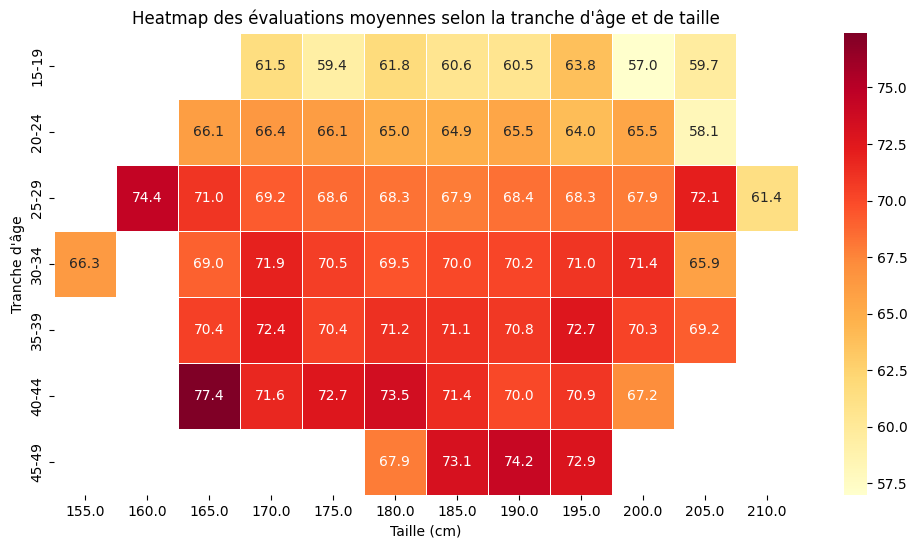

In [224]:
height_age_rating = """
SELECT 
    ROUND(p.height / 5) * 5 AS rounded_height_range,  -- Tranche de taille par multiples de 5 cm
    ((CAST(strftime('%Y', (SELECT MAX(date) FROM Player_Attributes)) AS INTEGER) - CAST(strftime('%Y', p.birthday) AS INTEGER)) / 5) * 5 AS age_range_start,
    COUNT(DISTINCT p.player_api_id) AS player_count,
    AVG(pa.overall_rating) AS avg_rating
FROM Player p
JOIN Player_Attributes pa ON p.player_api_id = pa.player_api_id
WHERE p.height IS NOT NULL 
  AND p.birthday IS NOT NULL 
  AND pa.overall_rating IS NOT NULL
GROUP BY rounded_height_range, age_range_start
ORDER BY rounded_height_range, age_range_start;
"""

df_height_age_rating = pd.read_sql(height_age_rating, conn)
df_height_age_rating["age_range"] = (
    df_height_age_rating["age_range_start"].astype(int).astype(str) 
    + "-" + 
    (df_height_age_rating["age_range_start"] + 4).astype(str)
)

# Utilisation de pivot_table pour éviter les doublons
heatmap_data = df_height_age_rating.pivot_table(
    index="age_range", 
    columns="rounded_height_range", 
    values="avg_rating", 
    aggfunc="mean"  # Si des doublons existent, prendre la moyenne
)

# Affichage du heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title("Heatmap des évaluations moyennes selon la tranche d'âge et de taille")
plt.xlabel("Taille (cm)")
plt.ylabel("Tranche d'âge")
plt.show()

In [ ]:
players_attr_freq="""SELECT PA.player_api_id,player_name, COUNT(*) AS num_entries
FROM Player_Attributes PA join Player P on PA.player_api_id=P.player_api_id
GROUP BY PA.player_api_id
ORDER BY num_entries DESC
LIMIT 5;"""

players_freq=pd.read_sql(players_attr_freq,conn)

print(players_freq)

   player_api_id      player_name  num_entries
0         210278  Roberto Pereyra           56
1          41269    Alessio Cerci           56
2          42116  Sebastian Meoli           55
3          26472  Michael Bradley           54
4         179795   Yacine Brahimi           53


In [228]:
player_freq_playing="""SELECT P.player_api_id, P.player_name, COUNT(*) AS matches_played
FROM (
    SELECT home_player_1 AS player_api_id FROM Match
    UNION ALL
    SELECT home_player_2 FROM Match
    UNION ALL
    SELECT home_player_3 FROM Match
    UNION ALL
    SELECT home_player_4 FROM Match
    UNION ALL
    SELECT home_player_5 FROM Match
    UNION ALL
    SELECT home_player_6 FROM Match
    UNION ALL
    SELECT home_player_7 FROM Match
    UNION ALL
    SELECT home_player_8 FROM Match
    UNION ALL
    SELECT home_player_9 FROM Match
    UNION ALL
    SELECT home_player_10 FROM Match
    UNION ALL
    SELECT home_player_11 FROM Match
    UNION ALL
    SELECT away_player_1 FROM Match
    UNION ALL
    SELECT away_player_2 FROM Match
    UNION ALL
    SELECT away_player_3 FROM Match
    UNION ALL
    SELECT away_player_4 FROM Match
    UNION ALL
    SELECT away_player_5 FROM Match
    UNION ALL
    SELECT away_player_6 FROM Match
    UNION ALL
    SELECT away_player_7 FROM Match
    UNION ALL
    SELECT away_player_8 FROM Match
    UNION ALL
    SELECT away_player_9 FROM Match
    UNION ALL
    SELECT away_player_10 FROM Match
    UNION ALL
    SELECT away_player_11 FROM Match
) AS all_players
JOIN Player P ON all_players.player_api_id = P.player_api_id
WHERE all_players.player_api_id IS NOT NULL
GROUP BY P.player_api_id, P.player_name
ORDER BY matches_played DESC
LIMIT 10;"""

player_freq_playing=pd.read_sql(player_freq_playing,conn)

player_freq_playing.head()

,player_api_id,player_name,matches_played
0,31293,Steve Mandanda,289
1,31465,Tim Howard,277
2,26295,Hugo Lloris,272
3,41097,Stephane Ruffier,270
4,31432,Joe Hart,269


In [229]:
player_low_freq_playing="""SELECT P.player_api_id, P.player_name, COUNT(*) AS matches_played
FROM (
    SELECT home_player_1 AS player_api_id FROM Match
    UNION ALL
    SELECT home_player_2 FROM Match
    UNION ALL
    SELECT home_player_3 FROM Match
    UNION ALL
    SELECT home_player_4 FROM Match
    UNION ALL
    SELECT home_player_5 FROM Match
    UNION ALL
    SELECT home_player_6 FROM Match
    UNION ALL
    SELECT home_player_7 FROM Match
    UNION ALL
    SELECT home_player_8 FROM Match
    UNION ALL
    SELECT home_player_9 FROM Match
    UNION ALL
    SELECT home_player_10 FROM Match
    UNION ALL
    SELECT home_player_11 FROM Match
    UNION ALL
    SELECT away_player_1 FROM Match
    UNION ALL
    SELECT away_player_2 FROM Match
    UNION ALL
    SELECT away_player_3 FROM Match
    UNION ALL
    SELECT away_player_4 FROM Match
    UNION ALL
    SELECT away_player_5 FROM Match
    UNION ALL
    SELECT away_player_6 FROM Match
    UNION ALL
    SELECT away_player_7 FROM Match
    UNION ALL
    SELECT away_player_8 FROM Match
    UNION ALL
    SELECT away_player_9 FROM Match
    UNION ALL
    SELECT away_player_10 FROM Match
    UNION ALL
    SELECT away_player_11 FROM Match
) AS all_players
JOIN Player P ON all_players.player_api_id = P.player_api_id
WHERE all_players.player_api_id IS NOT NULL
GROUP BY P.player_api_id, P.player_name
ORDER BY matches_played ASC
LIMIT 10;"""

player_low_freq_playing=pd.read_sql(player_low_freq_playing,conn)

player_low_freq_playing.head()

,player_api_id,player_name,matches_played
0,2796,Javier Jimenez,1
1,3264,Abdelmalek Cherrad,1
2,3377,Luca Belingheri,1
3,5700,Charles Dissels,1
4,6824,Pedro Kamata,1


In [230]:
players_evolution="""SELECT player_api_id, date, overall_rating, potential
FROM Player_Attributes
WHERE player_api_id IN (
    SELECT player_api_id 
    FROM Player 
    WHERE player_name LIKE '%Messi%' OR player_name LIKE '%Ronaldo%'
)
ORDER BY player_api_id, date;"""

players_evolution=pd.read_sql(players_evolution,conn)

print(players_evolution)

    player_api_id                 date  overall_rating  potential
0           30893  2007-02-22 00:00:00            87.0       92.0
1           30893  2007-08-30 00:00:00            91.0       94.0
2           30893  2008-08-30 00:00:00            91.0       94.0
3           30893  2009-02-22 00:00:00            90.0       94.0
4           30893  2009-08-30 00:00:00            89.0       94.0
..            ...                  ...             ...        ...
68         182849  2016-01-14 00:00:00            64.0       68.0
69         182849  2016-01-21 00:00:00            64.0       68.0
70         182849  2016-04-14 00:00:00            64.0       66.0
71         182849  2016-04-21 00:00:00            64.0       64.0
72         182849  2016-05-12 00:00:00            64.0       64.0

[73 rows x 4 columns]


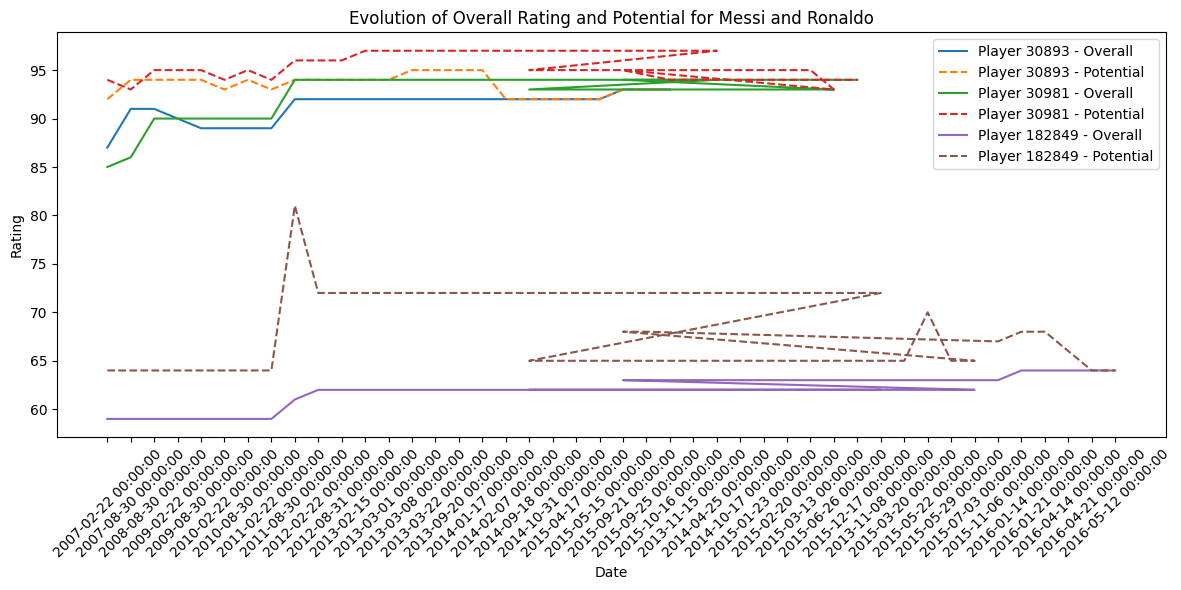

In [186]:
# On récupère les noms uniques des joueurs
player_ids = players_evolution['player_api_id'].unique()

# Création du graphique
plt.figure(figsize=(12, 6))

for pid in player_ids:
    player_data = players_evolution[players_evolution['player_api_id'] == pid]
    plt.plot(player_data['date'], player_data['overall_rating'], label=f'Player {pid} - Overall')
    plt.plot(player_data['date'], player_data['potential'], linestyle='--', label=f'Player {pid} - Potential')

plt.xlabel('Date')
plt.ylabel('Rating')
plt.title("Evolution of Overall Rating and Potential for Messi and Ronaldo")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

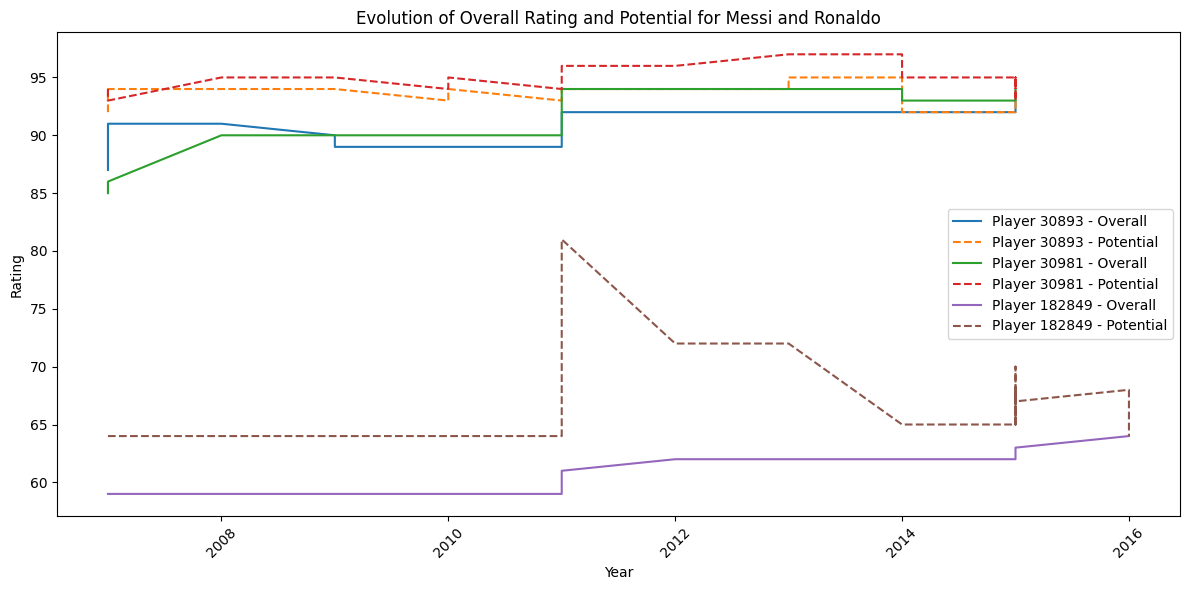

In [231]:
import matplotlib.pyplot as plt
import pandas as pd

# Requête SQL
players_evolution = """
SELECT player_api_id, date, overall_rating, potential
FROM Player_Attributes
WHERE player_api_id IN (
    SELECT player_api_id 
    FROM Player 
    WHERE player_name LIKE '%Messi%' OR player_name LIKE '%Ronaldo%'
)
ORDER BY player_api_id, date;
"""

# Lecture SQL
players_evolution = pd.read_sql(players_evolution, conn)

# Convertir la colonne date en datetime
players_evolution['date'] = pd.to_datetime(players_evolution['date'])

# Extraire uniquement l’année
players_evolution['year'] = players_evolution['date'].dt.year

# Liste des joueurs à tracer
player_ids = players_evolution['player_api_id'].unique()

# Tracé du graphique
plt.figure(figsize=(12, 6))

for pid in player_ids:
    player_data = players_evolution[players_evolution['player_api_id'] == pid]
    plt.plot(player_data['year'], player_data['overall_rating'], label=f'Player {pid} - Overall')
    plt.plot(player_data['year'], player_data['potential'], linestyle='--', label=f'Player {pid} - Potential')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title("Evolution of Overall Rating and Potential for Messi and Ronaldo")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [187]:
match_data = pd.read_sql("""
SELECT id, 
       home_player_X1, home_player_Y1, home_player_X2, home_player_Y2,
       home_player_X3, home_player_Y3, home_player_X4, home_player_Y4,
       home_player_X5, home_player_Y5, home_player_X6, home_player_Y6,
       home_player_X7, home_player_Y7, home_player_X8, home_player_Y8,
       home_player_X9, home_player_Y9, home_player_X10, home_player_Y10,
       home_player_X11, home_player_Y11
FROM Match
WHERE home_player_X1 != 0
LIMIT 1
""", conn)

In [232]:
home_goals_by_cominaison="""SELECT 
    home_player_X1,
    home_player_X2,
    home_player_X3,
    ROUND(AVG(home_team_goal), 2) AS avg_home_goals,
    COUNT(*) AS match_count
FROM Match
WHERE home_player_X1 IS NOT NULL 
  AND home_player_X2 IS NOT NULL 
  AND home_player_X3 IS NOT NULL
GROUP BY home_player_X1, home_player_X2, home_player_X3
ORDER BY avg_home_goals DESC
LIMIT 20;"""

home_goals_by_cominaison=pd.read_sql(home_goals_by_cominaison,conn)

print(home_goals_by_cominaison)

    home_player_X1  home_player_X2  home_player_X3  avg_home_goals  \
0              1.0             8.0             2.0            2.88   
1              1.0             4.0             8.0            2.58   
2              1.0             8.0             4.0            2.50   
3              1.0             6.0             2.0            2.22   
4              1.0             1.0             7.0            2.00   
5              1.0             5.0             7.0            2.00   
6              1.0             8.0             6.0            2.00   
7              1.0             3.0             7.0            1.67   
8              1.0             2.0             4.0            1.56   
9              1.0             3.0             5.0            1.53   
10             1.0             3.0             4.0            1.48   
11             1.0             2.0             6.0            1.47   
12             1.0             2.0             8.0            1.46   
13             1.0  

In [233]:
guardian_impact="""SELECT
    m.id AS match_id,
    m.date,
    m.home_team_goal,
    m.away_team_goal,
    pa_home.gk_reflexes AS home_gk_reflexes,
    pa_home.gk_diving AS home_gk_diving,
    pa_away.gk_reflexes AS away_gk_reflexes,
    pa_away.gk_diving AS away_gk_diving
FROM Match m
LEFT JOIN Player_Attributes pa_home
    ON pa_home.player_api_id = m.home_player_1
    AND pa_home.date <= m.date
LEFT JOIN Player_Attributes pa_away
    ON pa_away.player_api_id = m.away_player_1
    AND pa_away.date <= m.date
WHERE pa_home.date = (
    SELECT MAX(date)
    FROM Player_Attributes
    WHERE player_api_id = m.home_player_1 AND date <= m.date
)
AND pa_away.date = (
    SELECT MAX(date)
    FROM Player_Attributes
    WHERE player_api_id = m.away_player_1 AND date <= m.date
)
LIMIT 20;"""

guardian_impact=pd.read_sql(guardian_impact,conn)



In [234]:
guardian_impact.head()

,match_id,date,home_team_goal,away_team_goal,home_gk_reflexes,home_gk_diving,away_gk_reflexes,away_gk_diving
0,146,2009-02-27 00:00:00,2,1,68.0,63.0,64.0,62.0
1,154,2009-03-08 00:00:00,1,3,66.0,63.0,76.0,75.0
2,156,2009-03-07 00:00:00,2,0,70.0,67.0,62.0,64.0
3,163,2009-03-13 00:00:00,2,1,68.0,63.0,70.0,67.0
4,174,2009-03-22 00:00:00,1,0,72.0,73.0,62.0,64.0


In [235]:
odds="""SELECT 
    id,
    B365H, B365D, B365A,
    CASE 
        WHEN B365H < B365A THEN 'home_favorite'
        WHEN B365H > B365A THEN 'away_favorite'
        ELSE 'balanced'
    END AS favorite_team
FROM Match
WHERE B365H IS NOT NULL AND B365A IS NOT NULL;"""

odds=pd.read_sql(odds,conn)

odds.head()

,id,B365H,B365D,B365A,favorite_team
0,146,3.00,3.4,2.30,away_favorite
1,154,2.80,3.2,2.37,away_favorite
2,156,1.40,4.5,8.00,home_favorite
3,163,4.50,3.6,1.75,away_favorite
4,169,1.75,3.5,4.75,home_favorite


In [236]:
favorite_team="""SELECT 
    m.id AS match_id,
    ht.team_long_name AS home_team,
    at.team_long_name AS away_team,
    m.B365H, m.B365A,
    CASE 
        WHEN m.B365H < m.B365A THEN ht.team_long_name
        WHEN m.B365H > m.B365A THEN at.team_long_name
        ELSE 'Équipes équilibrées'
    END AS favorite_team
FROM Match m
JOIN Team ht ON m.home_team_api_id = ht.team_api_id
JOIN Team at ON m.away_team_api_id = at.team_api_id
WHERE m.B365H IS NOT NULL AND m.B365A IS NOT NULL;"""

favorite_team=pd.read_sql(favorite_team,conn)

favorite_team.head()

,match_id,home_team,away_team,B365H,B365A,favorite_team
0,146,KV Mechelen,KRC Genk,3.00,2.30,KRC Genk
1,154,KSV Cercle Brugge,Club Brugge KV,2.80,2.37,Club Brugge KV
2,156,RSC Anderlecht,SV Zulte-Waregem,1.40,8.00,RSC Anderlecht
3,163,KV Mechelen,RSC Anderlecht,4.50,1.75,RSC Anderlecht
4,169,SV Zulte-Waregem,KSV Roeselare,1.75,4.75,SV Zulte-Waregem


In [237]:
odds_gap="""SELECT 
    id,
    B365H, B365D, B365A,
    MIN(B365H, B365D, B365A) AS min_odd,
    MAX(B365H, B365D, B365A) - MIN(B365H, B365D, B365A) AS odd_gap
FROM Match
WHERE B365H IS NOT NULL AND B365D IS NOT NULL AND B365A IS NOT NULL;"""

odds_gap=pd.read_sql(odds_gap,conn)
odds_gap.head()

,id,B365H,B365D,B365A,min_odd,odd_gap
0,146,3.00,3.4,2.30,2.30,1.10
1,154,2.80,3.2,2.37,2.37,0.83
2,156,1.40,4.5,8.00,1.40,6.60
3,163,4.50,3.6,1.75,1.75,2.75
4,169,1.75,3.5,4.75,1.75,3.00


In [17]:
real_victory="""SELECT 
    CASE 
        WHEN B365H < B365A THEN 'home_favored'
        WHEN B365H > B365A THEN 'away_favored'
        ELSE 'balanced'
    END AS favored_side,
    COUNT(*) AS total_matches,

    -- Nombre de fois où le favori gagne vraiment
    SUM(
        CASE 
            WHEN B365H < B365A AND home_team_goal > away_team_goal THEN 1
            WHEN B365H > B365A AND away_team_goal > home_team_goal THEN 1
            ELSE 0
        END
    ) AS favorite_wins,

    ROUND(1.0 *
        SUM(
            CASE 
                WHEN B365H < B365A AND home_team_goal > away_team_goal THEN 1
                WHEN B365H > B365A AND away_team_goal > home_team_goal THEN 1
                ELSE 0
            END
        ) / COUNT(*), 2
    ) AS win_rate_for_favorite

FROM Match
WHERE B365H IS NOT NULL AND B365A IS NOT NULL
GROUP BY favored_side;"""

real_victory=pd.read_sql(real_victory,conn)

real_victory.head()

,favored_side,total_matches,favorite_wins,win_rate_for_favorite
0,away_favored,5432,2738,0.50
1,balanced,148,0,0.00
2,home_favored,14218,7741,0.54


In [239]:
attributes_victory="""SELECT 
    AVG(ta.buildUpPlaySpeed) AS avg_buildUpPlaySpeed,
    AVG(ta.buildUpPlayDribbling) AS avg_buildUpPlayDribbling,
    AVG(ta.chanceCreationPassing) AS avg_chanceCreationPassing,
    AVG(ta.chanceCreationCrossing) AS avg_chanceCreationCrossing,
    AVG(ta.chanceCreationShooting) AS avg_chanceCreationShooting,
    AVG(ta.defencePressure) AS avg_defencePressure,
    AVG(ta.defenceAggression) AS avg_defenceAggression,
    AVG(ta.defenceTeamWidth) AS avg_defenceTeamWidth
FROM Match m
JOIN Team_Attributes ta
  ON (
    (m.home_team_goal > m.away_team_goal AND m.home_team_api_id = ta.team_api_id)
    OR
    (m.away_team_goal > m.home_team_goal AND m.away_team_api_id = ta.team_api_id)
  )
WHERE m.home_team_goal IS NOT NULL 
  AND m.away_team_goal IS NOT NULL;"""

attributes_victory=pd.read_sql(attributes_victory,conn)

attributes_victory.head()

,avg_buildUpPlaySpeed,avg_buildUpPlayDribbling,avg_chanceCreationPassing,avg_chanceCreationCrossing,avg_chanceCreationShooting,avg_defencePressure,avg_defenceAggression,avg_defenceTeamWidth
0,52.910796,48.572938,52.845963,54.588477,54.589111,47.430275,50.037456,52.537796


In [16]:
attributes_defeat="""SELECT 
    AVG(ta.buildUpPlaySpeed) AS avg_buildUpPlaySpeed,
    AVG(ta.buildUpPlayDribbling) AS avg_buildUpPlayDribbling,
    AVG(ta.chanceCreationPassing) AS avg_chanceCreationPassing,
    AVG(ta.chanceCreationCrossing) AS avg_chanceCreationCrossing,
    AVG(ta.chanceCreationShooting) AS avg_chanceCreationShooting,
    AVG(ta.defencePressure) AS avg_defencePressure,
    AVG(ta.defenceAggression) AS avg_defenceAggression,
    AVG(ta.defenceTeamWidth) AS avg_defenceTeamWidth
FROM Match m
JOIN Team_Attributes ta
  ON (
    (m.home_team_goal < m.away_team_goal AND m.home_team_api_id = ta.team_api_id)
    OR
    (m.away_team_goal < m.home_team_goal AND m.away_team_api_id = ta.team_api_id)
  )
WHERE m.home_team_goal IS NOT NULL 
  AND m.away_team_goal IS NOT NULL;"""


attributes_defeat=pd.read_sql(attributes_defeat,conn)

attributes_defeat.head()

,avg_buildUpPlaySpeed,avg_buildUpPlayDribbling,avg_chanceCreationPassing,avg_chanceCreationCrossing,avg_chanceCreationShooting,avg_defencePressure,avg_defenceAggression,avg_defenceTeamWidth
0,53.137325,48.562164,52.458636,54.400247,53.645887,45.699604,49.316418,51.928793


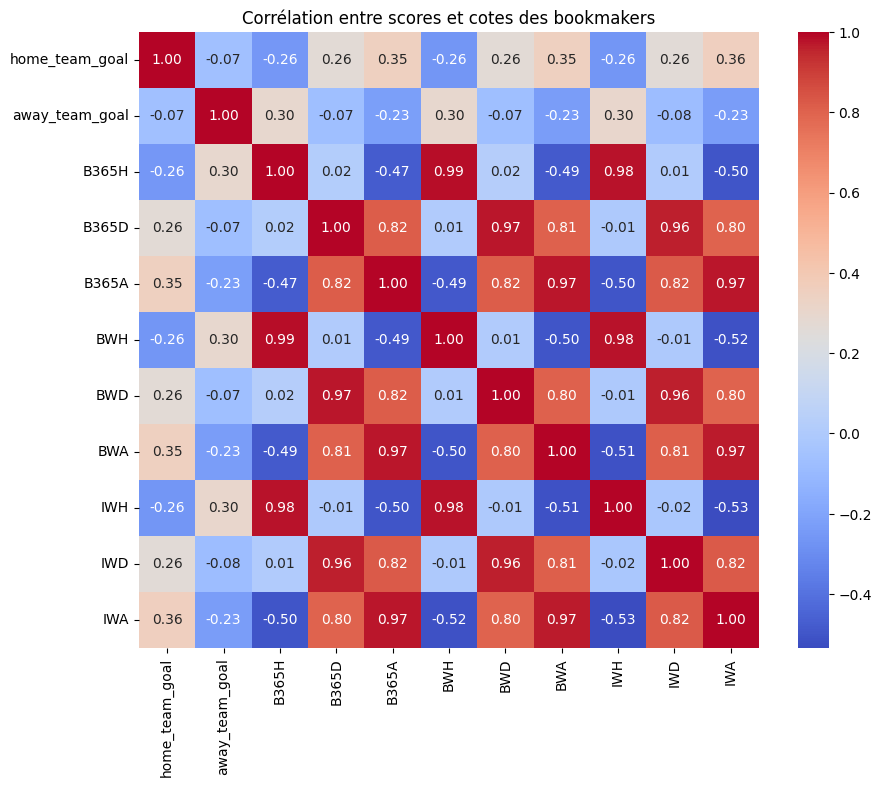

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes pertinentes
cols_corr = [
    'home_team_goal', 'away_team_goal',
    'B365H', 'B365D', 'B365A',
    'BWH', 'BWD', 'BWA',
    'IWH', 'IWD', 'IWA'
]

# Filtrer les colonnes disponibles (au cas où certaines sont absentes)
cols_corr = [col for col in cols_corr if col in df_match_cleaned.columns]

# Calcul de la matrice de corrélation
df_corr = df_match_cleaned[cols_corr].corr()

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre scores et cotes des bookmakers")
plt.show()

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [242]:
# Sélection des variables pertinentes

df_team_attr = pd.read_sql("SELECT * FROM Team_Attributes", conn)

features = [
    "buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing",
    "chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting",
    "defencePressure", "defenceAggression", "defenceTeamWidth"
]


df_team_features = df_team_attr[features]
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_team_features)

In [243]:
from sklearn.cluster import KMeans

# Choix du nombre de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des clusters au DataFrame
df_team_features["cluster"] = clusters

C:\Users\daniel\AppData\Local\Temp\ipykernel_60524\3496338061.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_features["cluster"] = clusters


In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Chargement depuis la base
df_team_attr = pd.read_sql("SELECT * FROM Team_Attributes", conn)

# Sélection des variables pertinentes
features = [
    "buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing",
    "chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting",
    "defencePressure", "defenceAggression", "defenceTeamWidth"
]

df_team_features = df_team_attr[features].copy()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_team_features)  # <-- SANS virgule ici !

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des labels de cluster au DataFrame
df_team_features["cluster"] = clusters

In [245]:
# Afficher les premières lignes avec cluster
print(df_team_features.head())

# Nombre d'équipes par cluster
print(df_team_features["cluster"].value_counts())

   buildUpPlaySpeed  buildUpPlayDribbling  buildUpPlayPassing  \
0                60             48.607362                  50   
1                52             48.000000                  56   
2                47             41.000000                  54   
3                70             48.607362                  70   
4                47             48.607362                  52   

   chanceCreationPassing  chanceCreationCrossing  chanceCreationShooting  \
0                     60                      65                      55   
1                     54                      63                      64   
2                     54                      63                      64   
3                     70                      70                      70   
4                     53                      48                      52   

   defencePressure  defenceAggression  defenceTeamWidth  cluster  
0               50                 55                45        2  
1               47

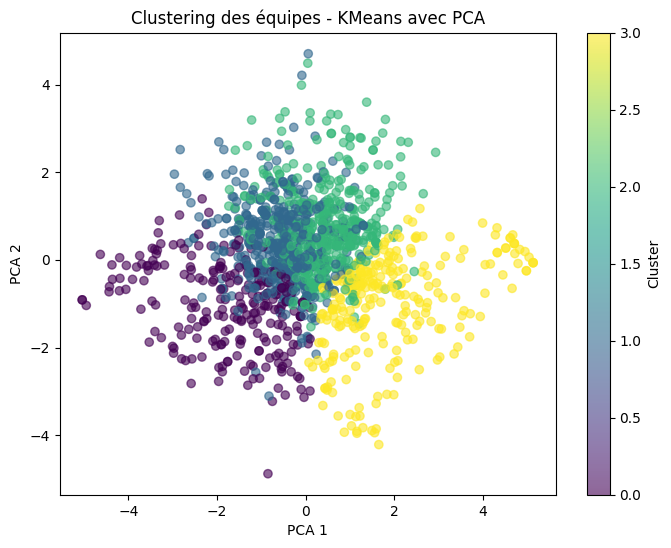

In [246]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction de la dimensionnalité à 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Création du DataFrame avec les deux premières composantes principales
df_team_features_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])

# Ajout des clusters pour coloration
df_team_features_pca["cluster"] = clusters

# Tracer les clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_team_features_pca["PCA1"], df_team_features_pca["PCA2"], c=df_team_features_pca["cluster"], cmap='viridis', alpha=0.6)
plt.title("Clustering des équipes - KMeans avec PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

In [21]:
query = """
SELECT 
    home_team_goal,
    away_team_goal,
    B365H, B365D, B365A,
    home_team_api_id,
    away_team_api_id
FROM Match
WHERE 
    B365H IS NOT NULL AND B365D IS NOT NULL AND B365A IS NOT NULL
    AND home_team_goal IS NOT NULL AND away_team_goal IS NOT NULL
"""
df = pd.read_sql(query, conn)

In [22]:
def get_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return "home_win"
    elif row['home_team_goal'] < row['away_team_goal']:
        return "away_win"
    else:
        return "draw"

df["match_result"] = df.apply(get_result, axis=1)

In [23]:
features = ["B365H", "B365D", "B365A"]
X = df[features]
y = df["match_result"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    away_win       0.45      0.39      0.42      1704
        draw       0.27      0.15      0.19      1521
    home_win       0.54      0.72      0.62      2715

    accuracy                           0.48      5940
   macro avg       0.42      0.42      0.41      5940
weighted avg       0.44      0.48      0.45      5940

Accuracy: 0.4786195286195286


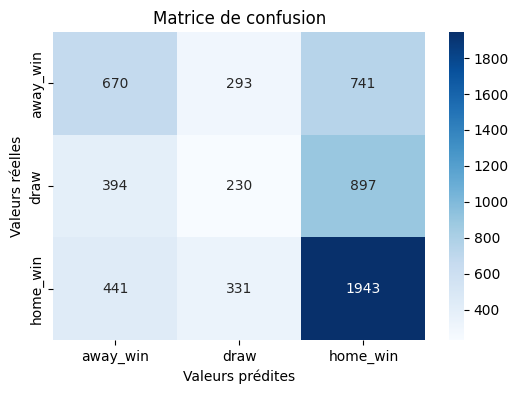

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Création d’un DataFrame pour un affichage clair
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

# Affichage avec seaborn pour visualisation claire
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()

In [70]:
query="""WITH home_attr AS (
    SELECT ta.team_api_id, ta.date, ta.buildUpPlaySpeed, ta.chanceCreationShooting, ta.defenceAggression
    FROM Team_Attributes ta
),
away_attr AS (
    SELECT ta.team_api_id, ta.date, ta.buildUpPlaySpeed, ta.chanceCreationShooting, ta.defenceAggression
    FROM Team_Attributes ta
)

SELECT 
    m.match_api_id,
    m.date,
    m.home_team_api_id,
    m.away_team_api_id,
    m.home_team_goal,
    m.away_team_goal,
    m.B365H, m.B365D, m.B365A,

    h.buildUpPlaySpeed AS home_buildUpPlaySpeed,
    h.chanceCreationShooting AS home_chanceCreationShooting,
    h.defenceAggression AS home_defenceAggression,

    a.buildUpPlaySpeed AS away_buildUpPlaySpeed,
    a.chanceCreationShooting AS away_chanceCreationShooting,
    a.defenceAggression AS away_defenceAggression

FROM Match m

LEFT JOIN (
    SELECT team_api_id, date, buildUpPlaySpeed, chanceCreationShooting, defenceAggression
    FROM Team_Attributes
) h ON h.team_api_id = m.home_team_api_id
   AND h.date = (
       SELECT MAX(date) 
       FROM Team_Attributes ta 
       WHERE ta.team_api_id = m.home_team_api_id AND ta.date <= m.date
   )

LEFT JOIN (
    SELECT team_api_id, date, buildUpPlaySpeed, chanceCreationShooting, defenceAggression
    FROM Team_Attributes
) a ON a.team_api_id = m.away_team_api_id
   AND a.date = (
       SELECT MAX(date) 
       FROM Team_Attributes ta 
       WHERE ta.team_api_id = m.away_team_api_id AND ta.date <= m.date
   )

WHERE 
    m.B365H IS NOT NULL AND m.B365D IS NOT NULL AND m.B365A IS NOT NULL
    AND m.home_team_goal IS NOT NULL AND m.away_team_goal IS NOT NULL;"""

df = pd.read_sql(query, conn)


In [71]:
def get_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return "home_win"
    elif row['home_team_goal'] < row['away_team_goal']:
        return "away_win"
    else:
        return "draw"

df["match_result"] = df.apply(get_result, axis=1)

In [72]:
features = [
    "B365H", "B365D", "B365A",
    "home_buildUpPlaySpeed", "home_chanceCreationShooting", "home_defenceAggression",
    "away_buildUpPlaySpeed", "away_chanceCreationShooting", "away_defenceAggression"
]
X = df[features]
y = df["match_result"]

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    away_win       0.47      0.40      0.43      1963
        draw       0.30      0.17      0.22      1645
    home_win       0.55      0.73      0.62      3051

    accuracy                           0.49      6659
   macro avg       0.44      0.43      0.42      6659
weighted avg       0.46      0.49      0.47      6659

Accuracy: 0.4931671422135456


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X_home = df[features]
y_home = df["home_team_goal"]

X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X_home, y_home, test_size=0.3, random_state=42)

model_home = RandomForestRegressor(random_state=42)
model_home.fit(X_train_home, y_train_home)

y_pred_home = model_home.predict(X_test_home)

print("🏠 Home Goals Prediction")
print("MSE:", mean_squared_error(y_test_home, y_pred_home))
print("R2 Score:", r2_score(y_test_home, y_pred_home))

🏠 Home Goals Prediction
MSE: 1.6181047456462816
R2 Score: 0.06041621190819324


In [79]:
y_away = df["away_team_goal"]

X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X_home, y_away, test_size=0.3, random_state=42)

model_away = RandomForestRegressor(random_state=42)
model_away.fit(X_train_away, y_train_away)

y_pred_away = model_away.predict(X_test_away)

print("🚗 Away Goals Prediction")
print("MSE:", mean_squared_error(y_test_away, y_pred_away))
print("R2 Score:", r2_score(y_test_away, y_pred_away))

🚗 Away Goals Prediction
MSE: 1.2807533855082078
R2 Score: 0.02622862995531905


In [82]:
# Suppression des lignes contenant des NaN
X_train_home = X_train_home.dropna()
y_train_home = y_train_home.loc[X_train_home.index]  # on garde la cohérence avec les index

X_test_home = X_test_home.dropna()
y_test_home = y_test_home.loc[X_test_home.index]

# Réentraîner Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_home, y_train_home)

# Prédictions
y_pred_home_gbr = gbr.predict(X_test_home)

# Évaluation
print("GBR Home MSE:", mean_squared_error(y_test_home, y_pred_home_gbr))
print("GBR Home R²:", r2_score(y_test_home, y_pred_home_gbr))

GBR Home MSE: 1.4983146165290058
GBR Home R²: 0.1409315085221614


In [81]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_home, y_train_home)
y_pred_home_xgb = xgb.predict(X_test_home)

print("XGB Home MSE:", mean_squared_error(y_test_home, y_pred_home_xgb))
print("XGB Home R2:", r2_score(y_test_home, y_pred_home_xgb))

XGB Home MSE: 1.6273525953292847
XGB Home R2: 0.055046260356903076


In [262]:
df_match_cleaned.to_csv("match_clean.csv", index=False, sep=',', encoding='utf-8')
df_player_cleaned.to_csv("Player.csv",index=False)
df_player_attr_cleaned.to_csv("Player_Attributes.csv",index=False)
df_team_attributes_cleaned.to_csv("Team_Attributes.csv",index=False)
df_League.to_csv("League.csv",index=False)
df_Country.to_csv("Country.csv",index=False)
df_Team.to_csv("Team.csv",index=False)

In [18]:
df_match_cleaned.shape
df_match_cleaned.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,...,2.30,2.65,3.25,2.35,2.90,3.25,2.30,2.80,3.2,2.25
1,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,...,2.25,2.65,3.20,2.35,2.90,3.20,2.30,2.62,3.2,2.38
2,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,...,8.50,1.30,4.35,8.00,1.35,4.33,8.50,1.36,4.2,7.00
3,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,...,1.73,4.35,3.30,1.75,4.50,3.40,1.75,4.20,3.3,1.75
4,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,...,5.00,1.65,3.50,4.50,1.65,3.50,5.00,1.70,3.4,4.33


In [20]:
df_match_cleaned.to_csv("match_clean.csv", index=False, sep=';', encoding='utf-8-sig')


In [26]:
df_match_player = pd.read_sql("""
SELECT match_api_id, home_team_api_id AS team_id, home_player_1 AS player_id FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_2 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_3 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_4 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_5 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_6 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_7 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_8 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_9 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_10 FROM Match
UNION ALL
SELECT match_api_id, home_team_api_id, home_player_11 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_1 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_2 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_3 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_4 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_5 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_6 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_7 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_8 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_9 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_10 FROM Match
UNION ALL
SELECT match_api_id, away_team_api_id, away_player_11 FROM Match
""", conn)

# Optionnel : enregistrer dans une nouvelle table SQLite (facultatif si tu vas exporter ensuite)
df_match_player.to_sql("match_player", conn, if_exists="replace", index=False)

# Exporter en CSV
df_match_player.to_csv("match_player.csv", index=False, encoding="utf-8-sig")

In [31]:
query = """
SELECT 
    strftime('%Y', pa.date) AS year,
    ROUND(AVG(pa.overall_rating), 2) AS avg_overall_rating
FROM Player_Attributes pa
JOIN Player p ON pa.player_api_id = p.player_api_id
WHERE p.player_name = 'Lionel Messi'
  AND pa.overall_rating IS NOT NULL
GROUP BY year
ORDER BY year;
"""

# Charger les résultats dans un DataFrame pandas
df_messi_season_avg = pd.read_sql_query(query, conn)

# Afficher le résultat
print(df_messi_season_avg)

   year  avg_overall_rating
0  2007               85.50
1  2008               90.00
2  2009               90.00
3  2010               90.00
4  2011               92.00
5  2012               94.00
6  2013               94.00
7  2014               93.33
8  2015               93.43
